# Introduction

HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably. Attrition in human resources refers to the gradual loss of employees over time and is one of the complex challenges that the people managers and the HR department have to deal with. In general, relatively high attrition is problematic for companies. 

For every company it's important and challenging to keep the employees happy and satisfied. If an employee you have invested much time and money leaves the company, this would mean that you would have to spend even more time and money to hire somebody else. 

**In this notebook the goal is to predict if an employee will leave the company or not (employee attrition).**

So what is Attrition and what determines it?
Attrition: It is basically the turnover rate of employees inside an organization.

This can happen for many reasons e.g.:
- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

In this notebook I'll use a fictional data set created by IBM data scientists (from kaggle) and I'll start with:
- **Setup & getting a feeling for my data (EDA):** Exploring the dataset by taking a look at each feature, how correlated one feature is to the other and create some visualisations
- **Feature Engineering:** Conduct some feature engineering as well as encode all our categorical features into dummy variables
- **Machine Learning models:** The following models will be performend 
    - Random Forest
    - Logistic Regression
    - KNN
    - Decision Tree
    - AdaBoost
    - XGBoost

# Setup

In [1]:
#import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sms
import copy
import glob

%matplotlib inline

#import libraries for model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import datatframe
df = pd.read_csv("/Users/raphaelaboll/nf-sep-20/Projects/employee/train.csv")

In [3]:
#take a first look at the data head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print('Dimension of the dataset:', df.shape)

Dimension of the dataset: (1058, 35)


As we can see in our dataset the target column would be the "Attrition" column.

# Getting a feeling for my data & business understanding¶

In [5]:
# check the name of columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#check null values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Luckily there are no null values, so we don't have to take any closer look at this topic.

In [7]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We see that we have a mix of numerical and categorical data types. For the categorical columns, I'll handle their numerical encoding in the latter chapter.     

## Correlation Matrix
By plotting a correlation matrix, we can get an overview of how the features are related to one another. As well we can use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in our dataframe.

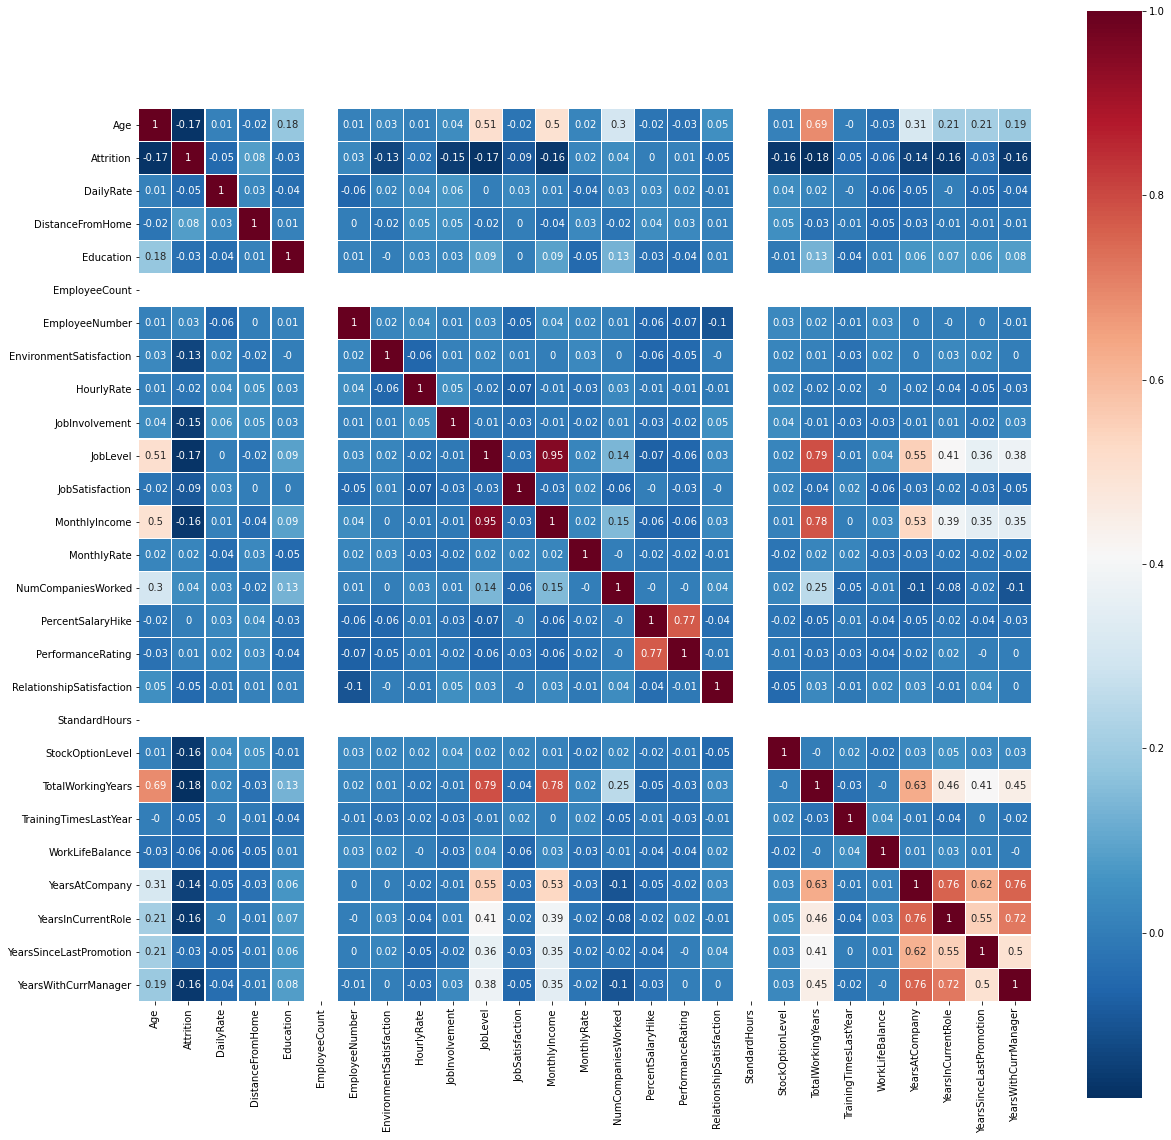

In [8]:
# heatmap - finding variables which are useful for prediction
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='RdBu_r',linewidths=0.2,square=True);

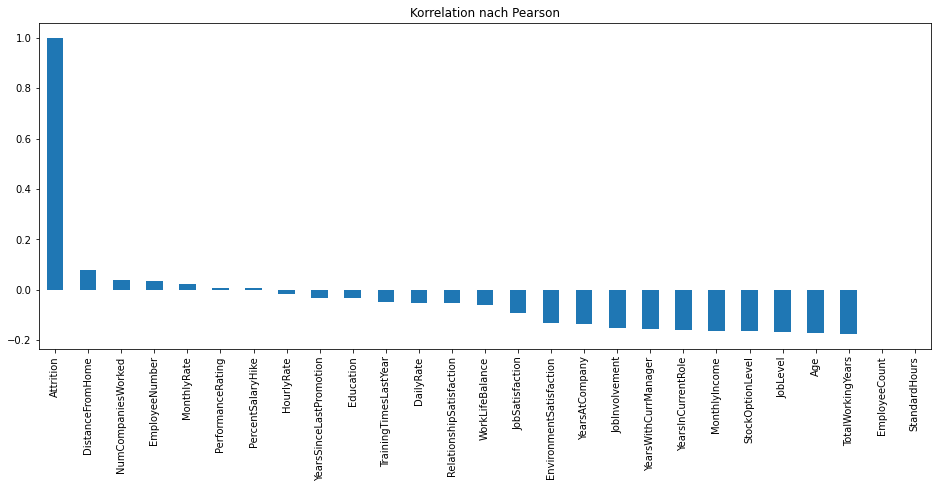

In [9]:
# correlation
basis=df.corr(method='pearson')['Attrition'].sort_values(axis=0, ascending=False)
basis.plot(kind='bar',figsize=(16,6),title='Korrelation nach Pearson');

The above heatmap shows the correlation between independent variables. We perform this to necessarily check for multi collinearity. A rule of thumb that is followed for multi collinearity is if correlation coefficient is close to 0.80. Based on that we identify the following variables to have a high correlation: 

* Correlation between MonthlyIncome and JobLevel is 0.95. This is a very high correlation.
* Correlation between TotalWorkingYears and JobLevel is 0.78 which is also very close to 0.80.
* All other variables seem to have a correlation which is less than 0.80.

Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features.

## Check for duplicates

In [10]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## Outliers

In [11]:
# # check for outliners via statistical insights 
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [12]:
#Boxblot - I'll put that to future work
#sns.set(rc={'figure.figsize':(20,10)})
#sns.boxplot(data=df, palette="Blues")
#plt.title('Distribution of Attrition', fontsize=14);

## Unique Values

In [13]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("---------------------------------------------------------")

Age: Number of unique values 43
---------------------------------------------------------
Attrition: Number of unique values 2
---------------------------------------------------------
BusinessTravel: Number of unique values 3
---------------------------------------------------------
DailyRate: Number of unique values 731
---------------------------------------------------------
Department: Number of unique values 3
---------------------------------------------------------
DistanceFromHome: Number of unique values 29
---------------------------------------------------------
Education: Number of unique values 5
---------------------------------------------------------
EducationField: Number of unique values 6
---------------------------------------------------------
EmployeeCount: Number of unique values 1
---------------------------------------------------------
EmployeeNumber: Number of unique values 1058
---------------------------------------------------------
EnvironmentSatisfactio

**Conclusion** We noticed that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, so we might drop those columns later on.

## Seperate the numerical and categorical columns

In [14]:
categorical = df.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [15]:
numerical = df.select_dtypes(include=['float64','int64'])
print(numerical.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


## Summary

Before I'll start with the EDA and visualizations, I'll sum up what I've found out till now. This will help to get a feeling how we should work with our data later throughout the project.

**Questions I asked / or still need to ask:**
- **Columns and Observations**: How many columns and observations are there in the dataset?
- **Missing data**: Are there any missing data in the dataset?
- **Data Type**: The different datatypes we are dealing in this dataset.

**Summary:**
- **Dataset Structure:** 1058 observations (rows), 35 features (variables) 
- **Missing Data:** Luckily, there is no missing data. This will make it easier to work with the dataset.
- **Data Type:** We only have two datatypes in this dataset: objects and integers
- **Label**: Attrition is the label in our dataset and we would like to find out why employees are leaving the organization
- **Correleation** We saw thet there is a correlation between MonthlyIncome and JobLevel as well as TotalWorkingYears and JobLevel 

# Data Exploration & Preparation

I'll start by taking a high-level look at the data provided. The dataset contains a ‘0/1’ field for attrition, indicating whether the employee has left the company or not. For the understanding it's good to know that 0 stands for employees who stayed at the company and 1 is for employees who left (attrition = yes).

Further more there are 34 features that describe the role of each employee in the company, gives us employee related information, describes their level of satisfaction, the salary and further more.

## Attrition (target variable)

In [16]:
print('No. of Attrition') 
print(df['Attrition'].groupby(df.Attrition).agg('count'))

No. of Attrition
Attrition
0    879
1    179
Name: Attrition, dtype: int64


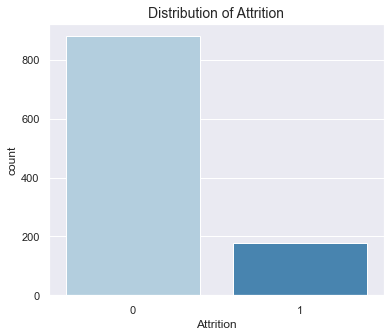

In [17]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(x="Attrition", data=df, palette="Blues")
plt.title('Distribution of Attrition', fontsize=14);

In [18]:
# number of employees leaving against all
a = (df.Attrition[df.Attrition == 0]).count()
c = (df.Attrition[df.Attrition == 1]).count()
b = df.Attrition.count()
print("Percantage share of employees staying: " + str(((a/b)*100).round(2)) + "%")
print("Percantage share of employees leaving: " + str(((c/b)*100).round(2)) + "%")

Percantage share of employees staying: 83.08%
Percantage share of employees leaving: 16.92%


In [19]:
# create df only with employees who left, we'll use it later for plots
leaver = df[df.Attrition == 1]

**Conclusion** We can see that nearly 83% of the employees stayed and 17% left the company. 

### Pairplots with our target variable 

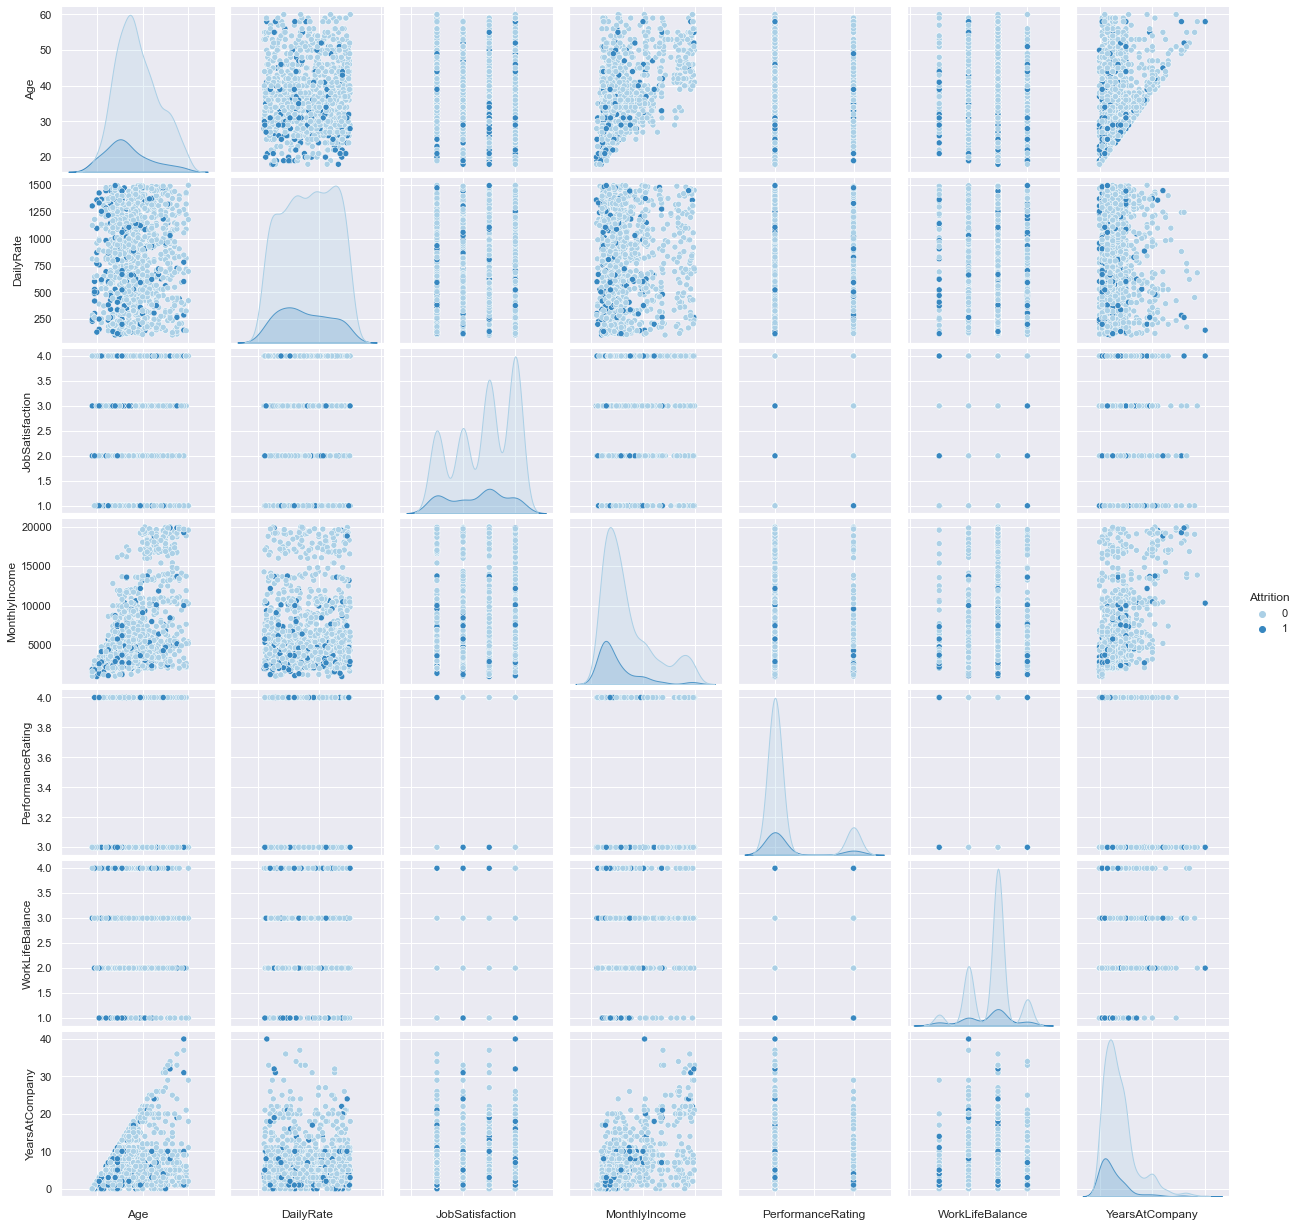

In [20]:
# Make a list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition']

g = sns.pairplot(df[numerical], hue='Attrition', palette='Blues', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

## Role of Employee in the company

### Jobrole

In [21]:
df.JobRole.value_counts()

Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: JobRole, dtype: int64

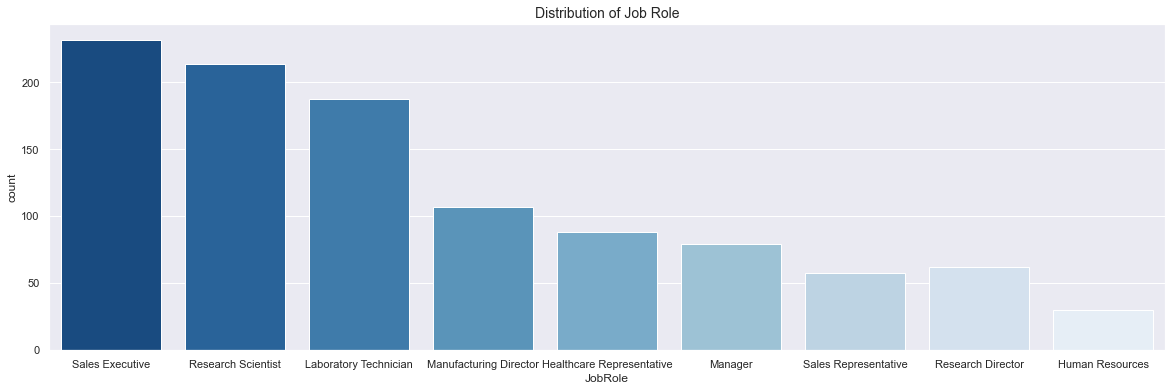

In [22]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x="JobRole", data=df, palette="Blues_r")
plt.title('Distribution of Job Role', fontsize=14);

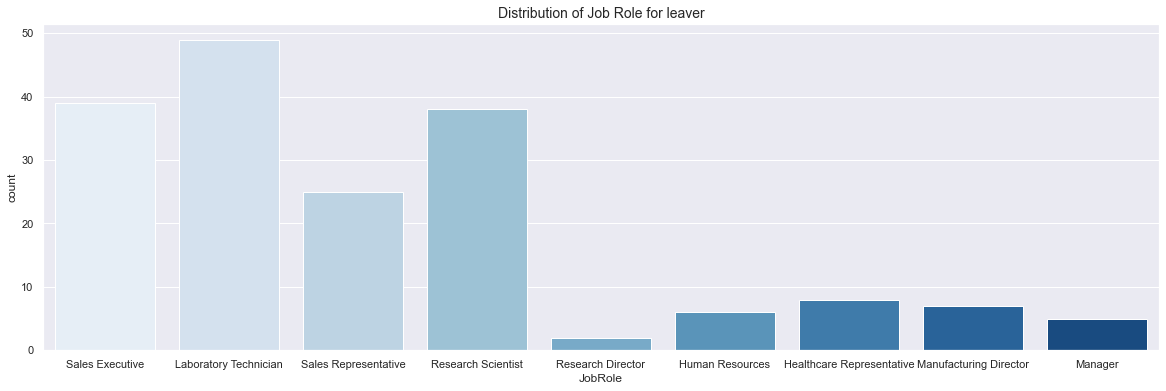

In [23]:
# leaver plot 
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x="JobRole", data=leaver, palette="Blues")
plt.title('Distribution of Job Role for leaver', fontsize=14);

In [24]:
leaver.JobRole.value_counts() 

Laboratory Technician        49
Sales Executive              39
Research Scientist           38
Sales Representative         25
Healthcare Representative     8
Manufacturing Director        7
Human Resources               6
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

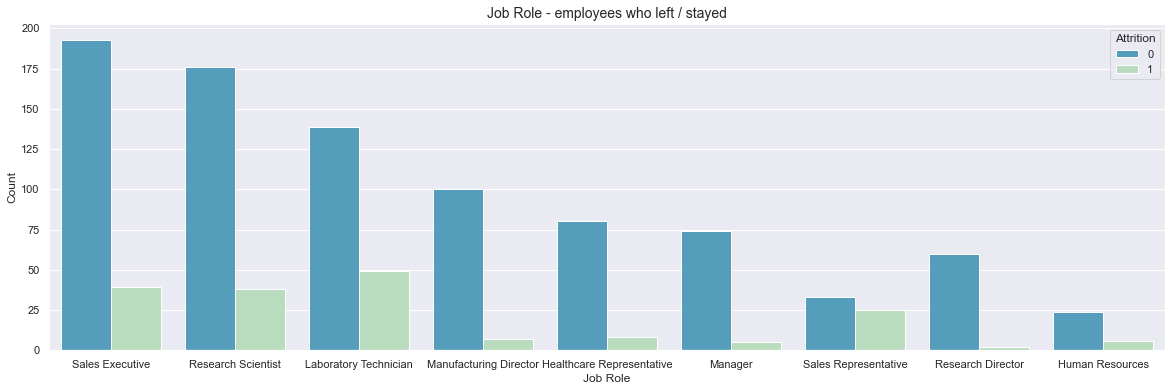

In [25]:
sns.countplot(x=df.JobRole, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Job Role - employees who left / stayed', fontsize=14)
plt.xlabel("Job Role")
plt.ylabel("Count");

In [26]:
# calculatio each ratio (leaver per jobrole)
df[['JobRole', 'Attrition']].groupby(['JobRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobRole,Attrition
8,Sales Representative,0.431034
2,Laboratory Technician,0.260638
1,Human Resources,0.200000
6,Research Scientist,0.177570
7,Sales Executive,0.168103
0,Healthcare Representative,0.090909
4,Manufacturing Director,0.065421
3,Manager,0.063291
5,Research Director,0.032258


**Conclusion** Most of our employees are working as a Sales Executive (232). In total most employees who left the company worked as a Laboratory Technician (49) followed by Sales Executives (39). But in relation 43% of the Sales Representatives left the company, followed by 26% of the Laboratory Technicians. 

### Job Level

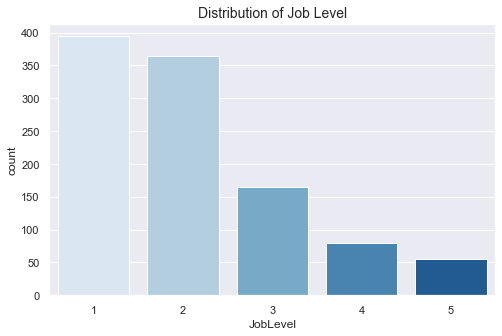

In [27]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="JobLevel", data=df, palette="Blues")
plt.title('Distribution of Job Level', fontsize=14);

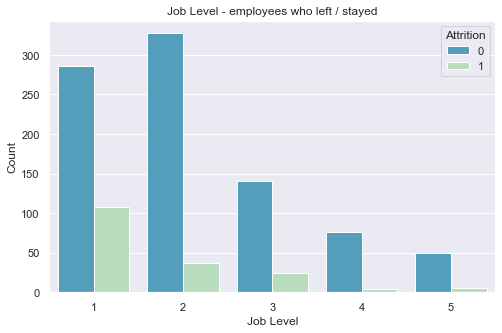

In [28]:
sns.countplot(x=df.JobLevel, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Job Level - employees who left / stayed')
plt.xlabel("Job Level")
plt.ylabel("Count");

In [29]:
# calculatio each ratio (leaver per gender)
df[['JobLevel', 'Attrition']].groupby(['JobLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobLevel,Attrition
0,1,0.274112
2,3,0.151515
1,2,0.101648
4,5,0.090909
3,4,0.050000


**Conclusion** In total most employees who left had a Job Level of 1 and the risk fo attrition is higher (27%). Further more we can see that employees with a higher job level (4 and 5) are not willing to leave a company.

### Department

In [30]:
df.Department.value_counts()

Research & Development    701
Sales                     319
Human Resources            38
Name: Department, dtype: int64

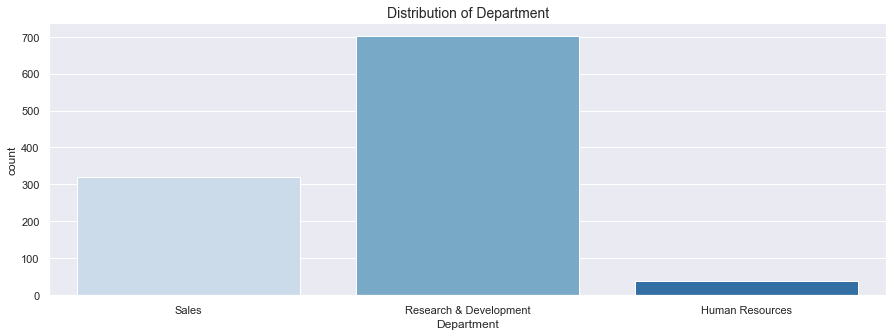

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="Department", data=df, palette="Blues")
plt.title('Distribution of Department', fontsize=14);

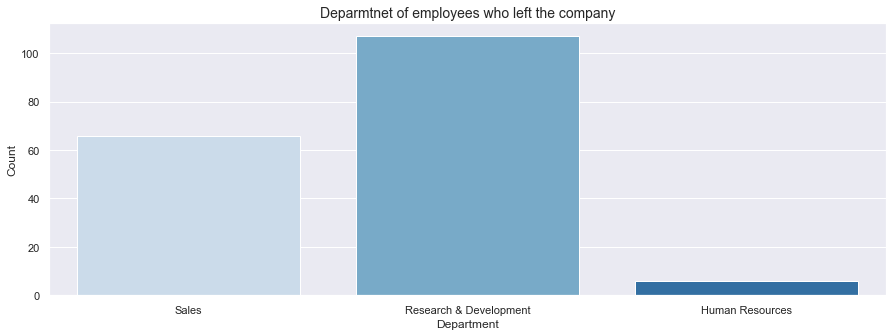

In [32]:
#plotting only with the leaver dataframe
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="Department", data=leaver, palette="Blues")
plt.title('Deparmtnet of employees who left the company', fontsize=14);
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12);

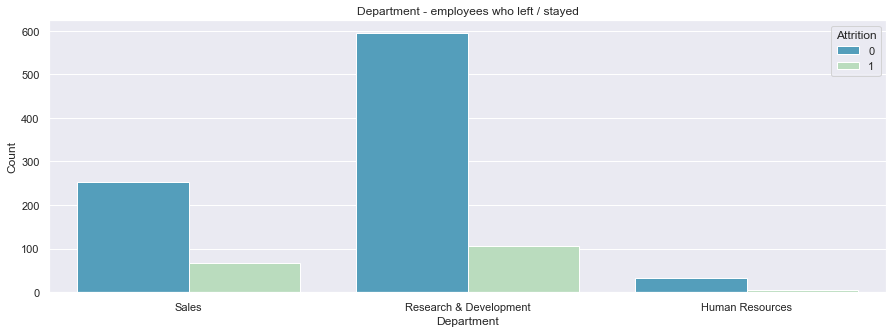

In [33]:
sns.countplot(x=df.Department, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Department - employees who left / stayed')
plt.xlabel("Department")
plt.ylabel("Count");

In [34]:
# calculatio each ratio (leaver per department)
df[['Department', 'Attrition']].groupby(['Department'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Department,Attrition
2,Sales,0.206897
0,Human Resources,0.157895
1,Research & Development,0.152639


**Conclusion** Sales (21%) and HR (16%) dept have higher attrition rate than R&D (15%) but in total, most employees who left worked at the Researche & Development Department.

### Years in current role

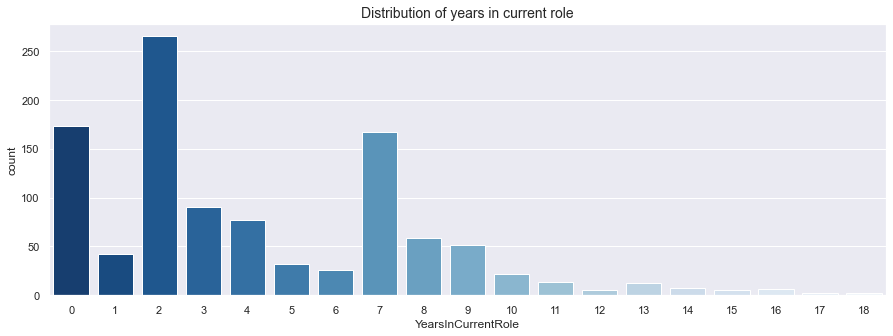

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="YearsInCurrentRole", data=df, palette="Blues_r")
plt.title('Distribution of years in current role', fontsize=14);

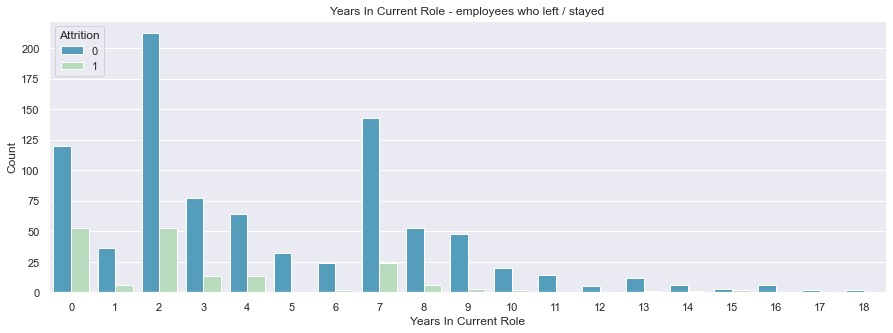

In [36]:
sns.countplot(x=df.YearsInCurrentRole, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Years In Current Role - employees who left / stayed')
plt.xlabel("Years In Current Role")
plt.ylabel("Count");

In [37]:
# calculatio each ratio (leaver per years in current role)
df[['YearsInCurrentRole', 'Attrition']].groupby(['YearsInCurrentRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsInCurrentRole,Attrition
15,15,0.400000
0,0,0.306358
2,2,0.200000
4,4,0.168831
3,3,0.144444
7,7,0.143713
1,1,0.142857
14,14,0.142857
8,8,0.101695
10,10,0.090909


**Conclusion** Most employees are working in their current role for 2 years followed by 7 years. Employees who are in their current role for 15 years are very willing to leave the company followed by freshers (0 or 2 years). Furthermore it seems that when an employee stays in a current role for a very long time, they are not so willing to leave the company.

### Years At Company 

In [38]:
df.YearsAtCompany.nunique()

35

In [39]:
print("The smallest number of years at the company is " + str(df.YearsAtCompany.min()))
print("The highest number of years at the company is " + str(df.YearsAtCompany.max()))

The smallest number of years at the company is 0
The highest number of years at the company is 40


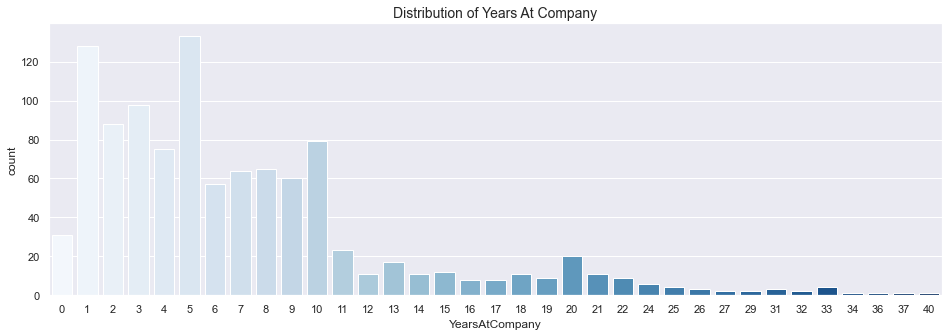

In [40]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(x="YearsAtCompany", data=df, palette="Blues")
plt.title('Distribution of Years At Company', fontsize=14);

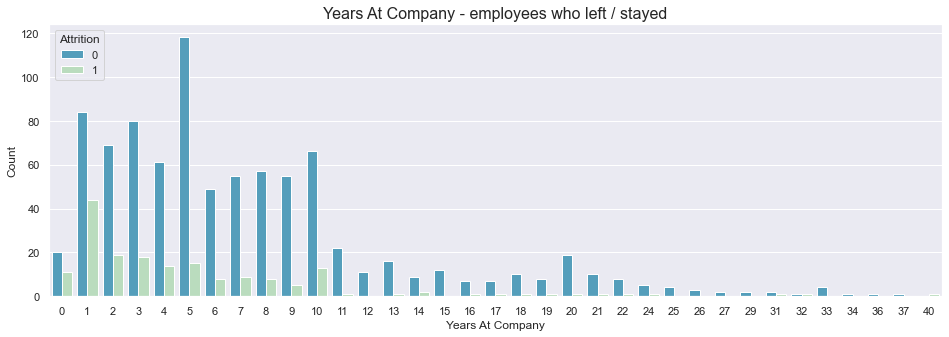

In [41]:
sns.countplot(x=df.YearsAtCompany, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Years At Company - employees who left / stayed', fontsize=16)
plt.xlabel("Years At Company")
plt.ylabel("Count");

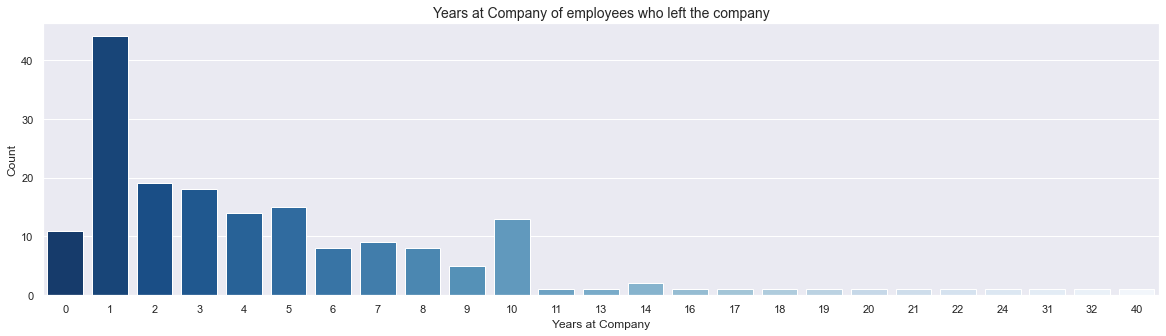

In [42]:
#plotting only with the leaver dataframe
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="YearsAtCompany", data=leaver, palette="Blues_r")
plt.title('Years at Company of employees who left the company', fontsize=14);
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Count", fontsize=12);

In [43]:
# calculatio each ratio (leaver per years at company)
df[['YearsAtCompany', 'Attrition']].groupby(['YearsAtCompany'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsAtCompany,Attrition
34,40,1.000000
29,32,0.500000
0,0,0.354839
1,1,0.343750
28,31,0.333333
2,2,0.215909
4,4,0.186667
3,3,0.183673
14,14,0.181818
23,24,0.166667


**Conclusion** As we can see, most of the employees staying for 5 years at the company followed by 1 year. Additionally we can see, in total most employees leaving in their second year and if an employee stays for longer at a company they are not so willing to leave. There is just on piek after 10 years. So it seems freshers at the company have higher attrition rate. But if we take a closer look at the percentage ratio it comes out that employees who stayed for a very long time are willing to leave (40 years = 100% and 32 years = 50%) and emoployees who stayed for a short time (First year = 35% and after 1 year =  34%). We need to keep in mind the 100% might because of retirement.

### Years With Current Manager

In [44]:
df.YearsWithCurrManager.nunique()

18

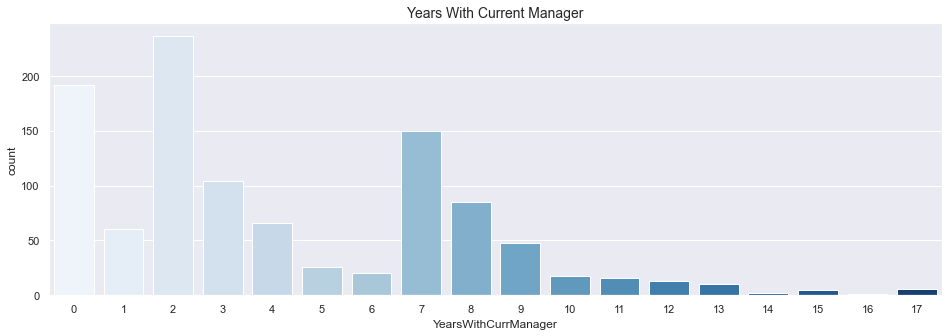

In [45]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(x="YearsWithCurrManager", data=df, palette="Blues")
plt.title('Years With Current Manager', fontsize=14);

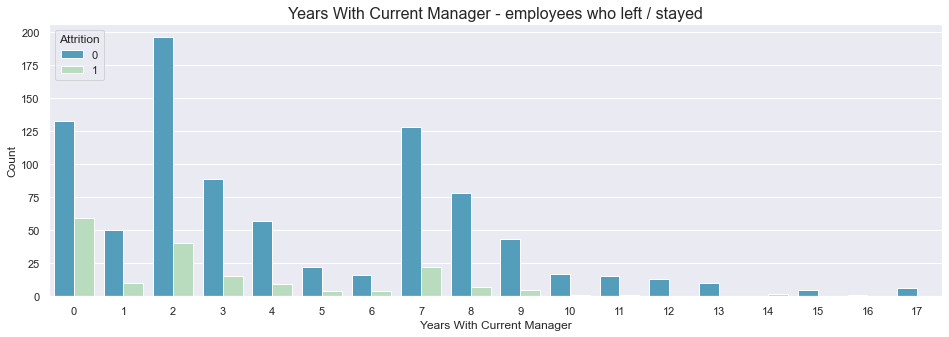

In [46]:
sns.countplot(x=df.YearsWithCurrManager, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Years With Current Manager - employees who left / stayed', fontsize=16)
plt.xlabel("Years With Current Manager")
plt.ylabel("Count");

In [47]:
# calculatio each ratio (leaver per years with current manager)
df[['YearsWithCurrManager', 'Attrition']].groupby(['YearsWithCurrManager'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsWithCurrManager,Attrition
14,14,1.000000
0,0,0.307292
6,6,0.200000
2,2,0.169492
1,1,0.166667
5,5,0.153846
7,7,0.146667
3,3,0.144231
4,4,0.136364
9,9,0.104167


**Conclusion** It's interesting that we can see most employees stayed for 2 years with their current manager and that there is a higher number for employees who stayed for 7 years with their current manager. Employees who stayed for 14 years with their current manager have a 100% chance of leaveing the company followed by employees in their first year (30%).

### Years Since Last Promotion

In [48]:
df.YearsSinceLastPromotion.nunique()

16

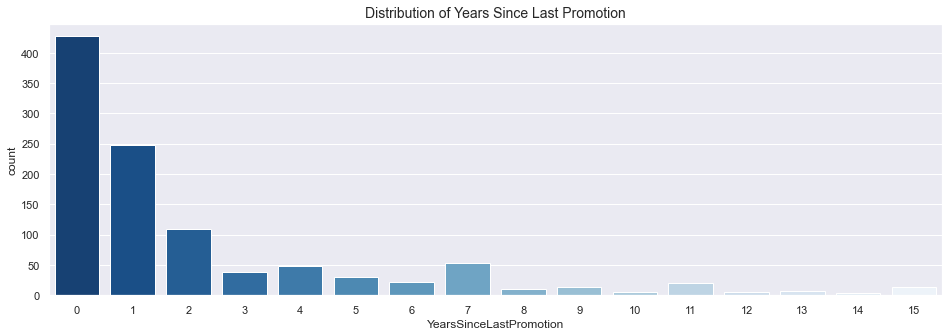

In [49]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(x="YearsSinceLastPromotion", data=df, palette="Blues_r")
plt.title('Distribution of Years Since Last Promotion', fontsize=14);

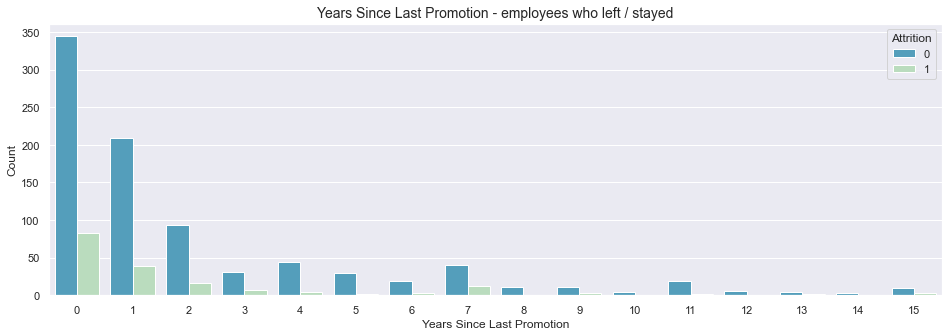

In [50]:
sns.countplot(x=df.YearsSinceLastPromotion, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Years Since Last Promotion - employees who left / stayed', fontsize=14)
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Count");

In [51]:
# calculatio each ratio (leaver per years with current manager)
df[['YearsSinceLastPromotion', 'Attrition']].groupby(['YearsSinceLastPromotion'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsSinceLastPromotion,Attrition
13,13,0.285714
7,7,0.245283
15,15,0.230769
9,9,0.214286
0,0,0.194379
3,3,0.184211
1,1,0.157258
2,2,0.154545
6,6,0.136364
4,4,0.102041


**Conclusion** As we can see most employees (in total) left the company had their last promotion the last year (1 year). At this stage it's uncleare if the employee just got a promotion and left the company a short time after it. Or if the employee left the company in the first year, before they got a promotion. At a second point we can see that there is an higher value after 7 years. Employees who got their last promotion 13 years ago are most willing to leave (28%) followed by 7 years (25%) and 15 years (23%).

### Business Travel

In [52]:
df.BusinessTravel.value_counts()

Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: BusinessTravel, dtype: int64

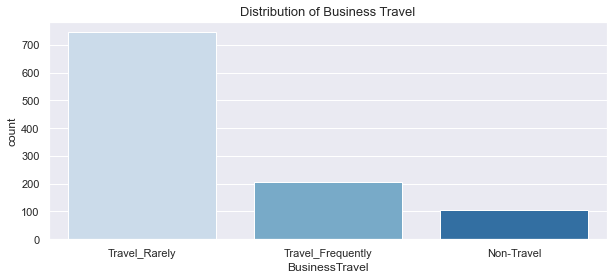

In [53]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="BusinessTravel", data=df, palette="Blues")
plt.title('Distribution of Business Travel', fontsize=13);

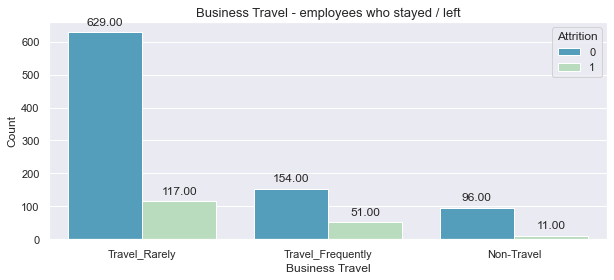

In [54]:
n = sns.countplot(x=df.BusinessTravel, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Business Travel - employees who stayed / left', fontsize=13)
plt.xlabel("Business Travel")
plt.ylabel("Count");
for p in n.patches:
    n.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [55]:
# calculatio each ratio (leaver per business travel)
df[['BusinessTravel', 'Attrition']].groupby(['BusinessTravel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.248780
2,Travel_Rarely,0.156836
0,Non-Travel,0.102804


**Conclusion**  Most of the employees who left, travelled from time to time (rarely) But we also can see that employees who travelled more frequently have much higher attrition rate than others (25%).

## Employee related Information

### Gender

In [56]:
df.Gender.value_counts()

Male      620
Female    438
Name: Gender, dtype: int64

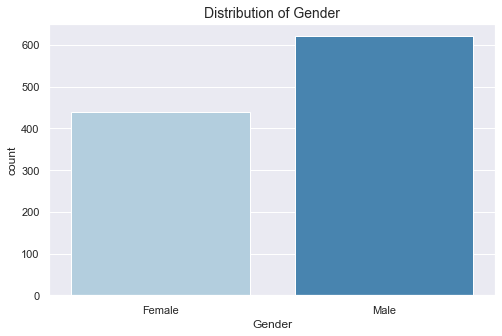

In [57]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="Gender", data=df, palette="Blues")
plt.title('Distribution of Gender', fontsize=14);

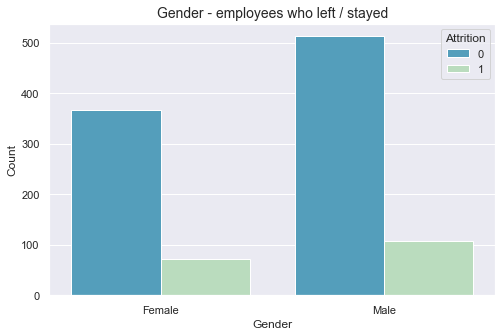

In [58]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x=df.Gender, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Gender - employees who left / stayed', fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count");

In [59]:
# gender counts in %
a = (df.Gender[df.Gender == 'Female']).count()
c = (df.Gender[df.Gender == 'Male']).count()
b = df.Gender.count()
print("Percantage share of female employees: " + str(((a/b)*100).round(2)) + "%")
print("Percantage share of male employees: " + str(((c/b)*100).round(2)) + "%")

Percantage share of female employees: 41.4%
Percantage share of male employees: 58.6%


In [60]:
# calculatio each ratio (leaver per gender)
df[['Gender', 'Attrition']].groupby(['Gender'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Gender,Attrition
1,Male,0.174194
0,Female,0.162100


In [61]:
# create df only with female employees
fem = df[df.Gender == "Female"]

In [62]:
# create df only with male employees
mal = df[df.Gender == "Male"]

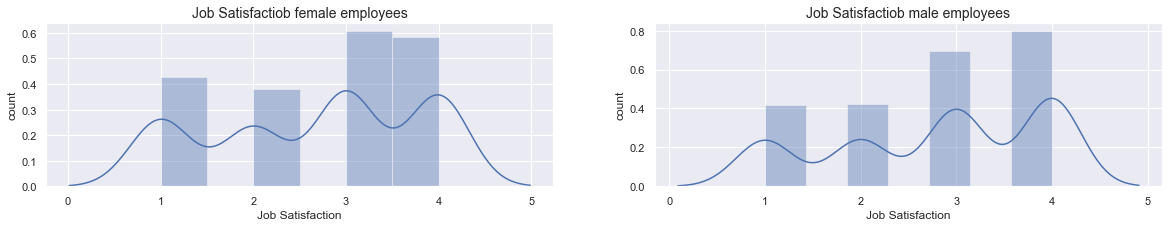

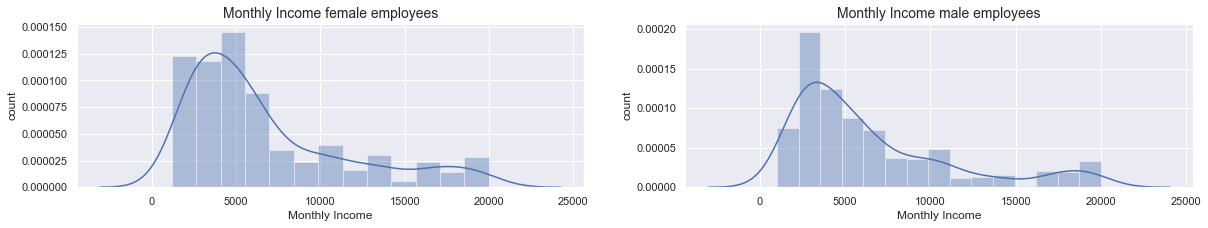

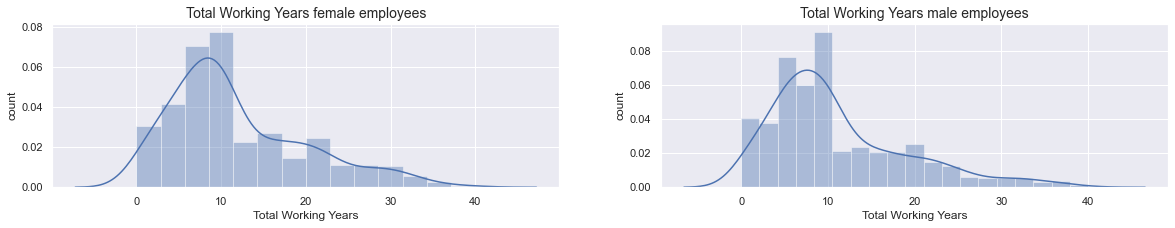

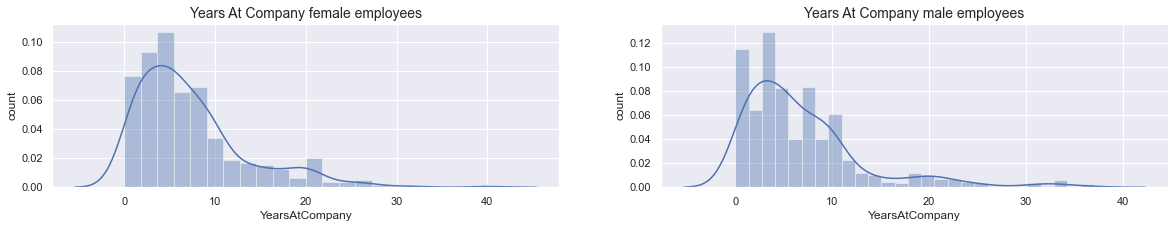

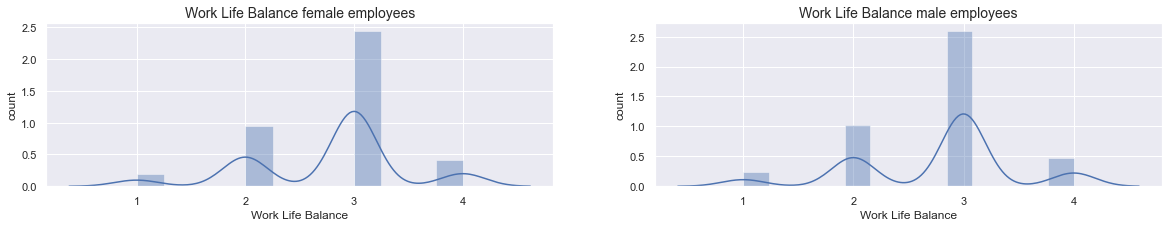

In [63]:
# distibution of age of female employees
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(fem.JobSatisfaction)
plt.title('Job Satisfactiob female employees', fontsize=14);
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(mal.JobSatisfaction)
plt.title('Job Satisfactiob male employees', fontsize=14);
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(fem.MonthlyIncome)
plt.title('Monthly Income female employees', fontsize=14);
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(mal.MonthlyIncome)
plt.title('Monthly Income male employees', fontsize=14);
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(fem.TotalWorkingYears)
plt.title('Total Working Years female employees', fontsize=14);
plt.xlabel("Total Working Years", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(mal.TotalWorkingYears)
plt.title('Total Working Years male employees', fontsize=14);
plt.xlabel("Total Working Years", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(fem.YearsAtCompany)
plt.title('Years At Company female employees', fontsize=14);
plt.xlabel("YearsAtCompany", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(mal.YearsAtCompany)
plt.title('Years At Company male employees', fontsize=14);
plt.xlabel("YearsAtCompany", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(fem.WorkLifeBalance)
plt.title('Work Life Balance female employees', fontsize=14);
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("count", fontsize=12);

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(mal.WorkLifeBalance)
plt.title('Work Life Balance male employees', fontsize=14);
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("count", fontsize=12);

**Conclusion** We can see that we do have 41.4% female employees and 58.6% male employees. Males have higher attrition rate than woman (17%).

### Age

In [64]:
print("The youngest employee is " + str(df.Age.min()) + " years old")
print("The oldest employee is " + str(df.Age.max()) + " years old")

The youngest employee is 18 years old
The oldest employee is 60 years old


In [65]:
# print(df.Age.value_counts())

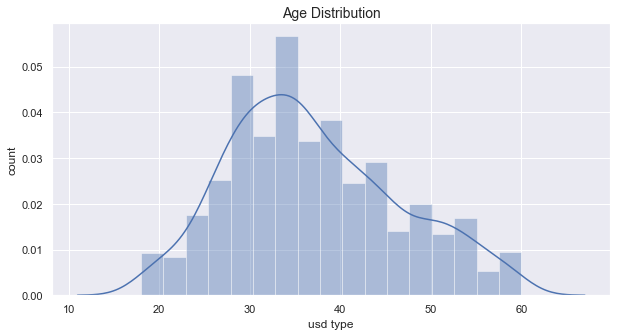

In [66]:
# distibution of age 
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df["Age"])
plt.title('Age Distribution', fontsize=14);
plt.xlabel("usd type", fontsize=12)
plt.ylabel("count", fontsize=12);

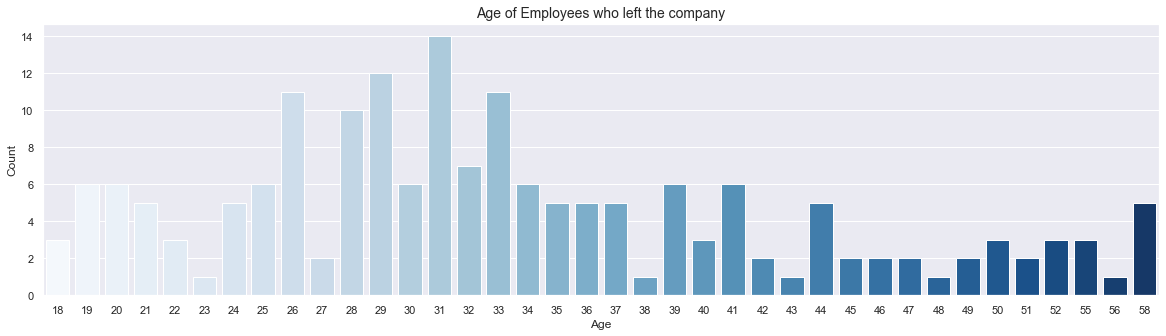

In [67]:
#plotting only with the leaver dataframe
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="Age", data=leaver, palette="Blues")
plt.title('Age of Employees who left the company', fontsize=14);
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12);

In [68]:
# create df only with female employees
age_fem = df[df.Gender == "Female"]

In [69]:
age_fem.Age.describe()

count    438.000000
mean      37.394977
std        9.474604
min       18.000000
25%       30.000000
50%       36.000000
75%       43.000000
max       60.000000
Name: Age, dtype: float64

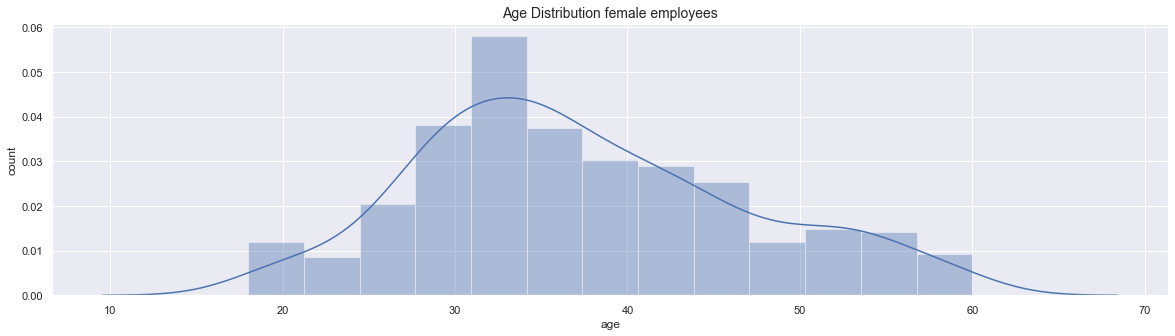

In [70]:
# distibution of age of female employees
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(age_fem.Age)
plt.title('Age Distribution female employees', fontsize=14);
plt.xlabel("age", fontsize=12)
plt.ylabel("count", fontsize=12);

In [71]:
# create df only with male employees
age_mal = df[df.Gender == "Male"]

In [72]:
age_mal.Age.describe()

count    620.000000
mean      36.816129
std        9.365064
min       18.000000
25%       30.000000
50%       35.000000
75%       43.000000
max       60.000000
Name: Age, dtype: float64

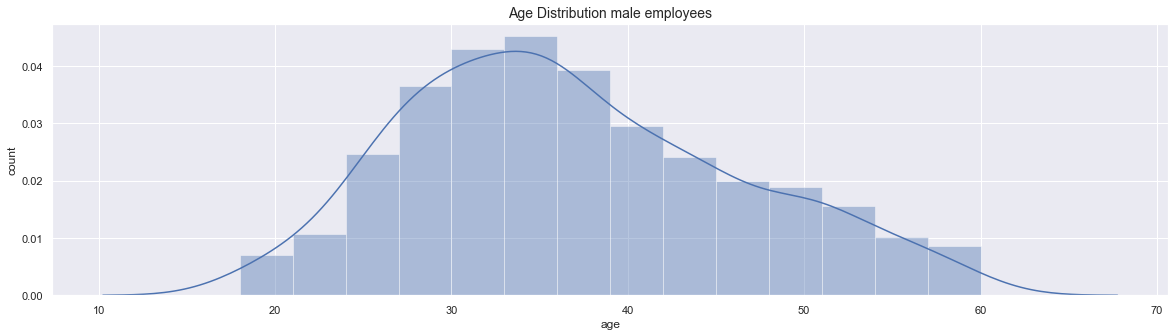

In [73]:
# distibution of age of female employees
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(age_mal.Age)
plt.title('Age Distribution male employees', fontsize=14);
plt.xlabel("age", fontsize=12)
plt.ylabel("count", fontsize=12);

**Conclusion**
Most employees who left, were at the mid agers ; 31 followed by 29.

**Age by Gender**: The average age of females is 37.39 and for males is 36.81 and both distributions are similar.

### Over 18 

In [74]:
df.Over18.value_counts()

Y    1058
Name: Over18, dtype: int64

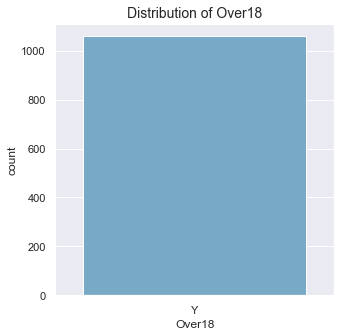

In [75]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x="Over18", data=df, palette="Blues")
plt.title('Distribution of Over18', fontsize=14);

**Conclusion** As we can see, all our employees are over 18. So we can drop this feature, there is no value for our prediction.

### Marital Status

In [76]:
df.MaritalStatus.value_counts()

Married     464
Single      352
Divorced    242
Name: MaritalStatus, dtype: int64

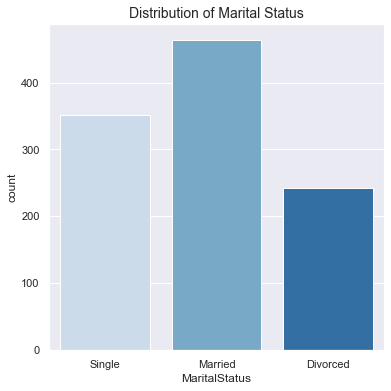

In [77]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="MaritalStatus", data=df, palette="Blues")
plt.title('Distribution of Marital Status', fontsize=14);

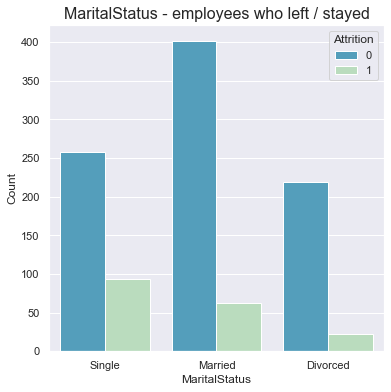

In [78]:
sns.countplot(x=df.MaritalStatus, data=df, hue='Attrition', palette="GnBu_r")
plt.title('MaritalStatus - employees who left / stayed', fontsize=16)
plt.xlabel("MaritalStatus")
plt.ylabel("Count");

In [79]:
df[['MaritalStatus', 'Attrition']].groupby(['MaritalStatus'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MaritalStatus,Attrition
2,Single,0.267045
1,Married,0.133621
0,Divorced,0.095041


**Conclusion** Most of the employees are married. But people with Marital Status as Single have much higher chance of attrition (27%), Married (13%) and Divorced (10%).

### Distance From Home 

In [80]:
df.DistanceFromHome.nunique()

29

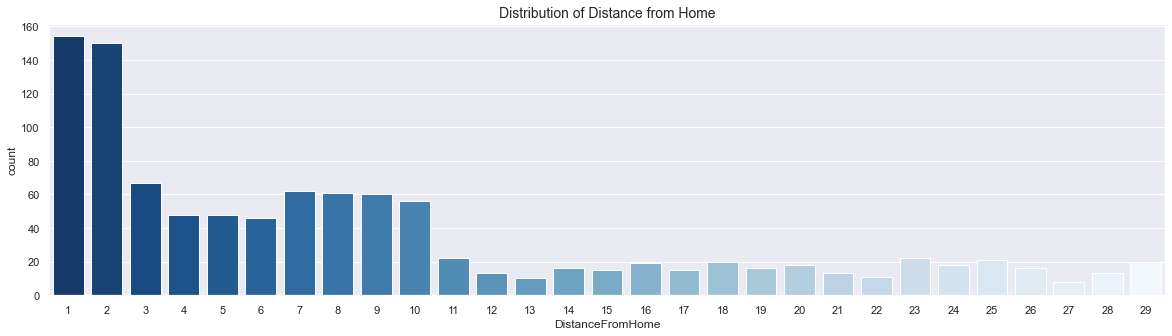

In [81]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="DistanceFromHome", data=df, palette="Blues_r")
plt.title('Distribution of Distance from Home', fontsize=14);

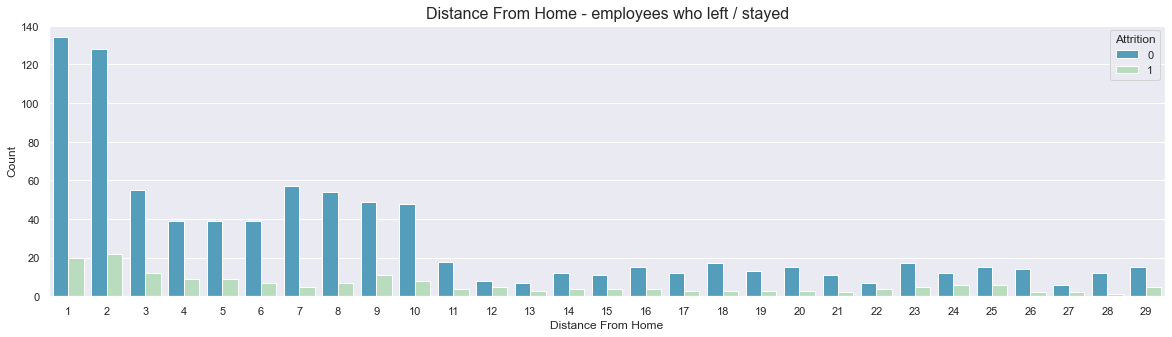

In [82]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x=df.DistanceFromHome, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Distance From Home - employees who left / stayed', fontsize=16)
plt.xlabel("Distance From Home")
plt.ylabel("Count");

In [83]:
# describe for distance to get a better understanding
perc =[.20, .40, .60, .80] 
df["DistanceFromHome"].describe(percentiles = perc) 

count    1058.000000
mean        8.978261
std         8.040608
min         1.000000
20%         2.000000
40%         5.000000
50%         7.000000
60%         8.000000
80%        16.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [84]:
# calculation each ratio (leaver per distance from home)
df[['DistanceFromHome', 'Attrition']].groupby(['DistanceFromHome'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,DistanceFromHome,Attrition
11,12,0.384615
21,22,0.363636
23,24,0.333333
12,13,0.300000
24,25,0.285714
14,15,0.266667
26,27,0.250000
13,14,0.250000
28,29,0.250000
22,23,0.227273


**Conclusion** It's seems that most of the employees do live close to the company. 50% of the employees do have a distance of 7. Unfortunately we don't know if it's kilometers or miles. Furthermore we can see that employees who have a long way to work are more willing to leave a company (Distance From Home 12 = 38%).

### Educational field

In [85]:
df.EducationField.value_counts()

Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: EducationField, dtype: int64

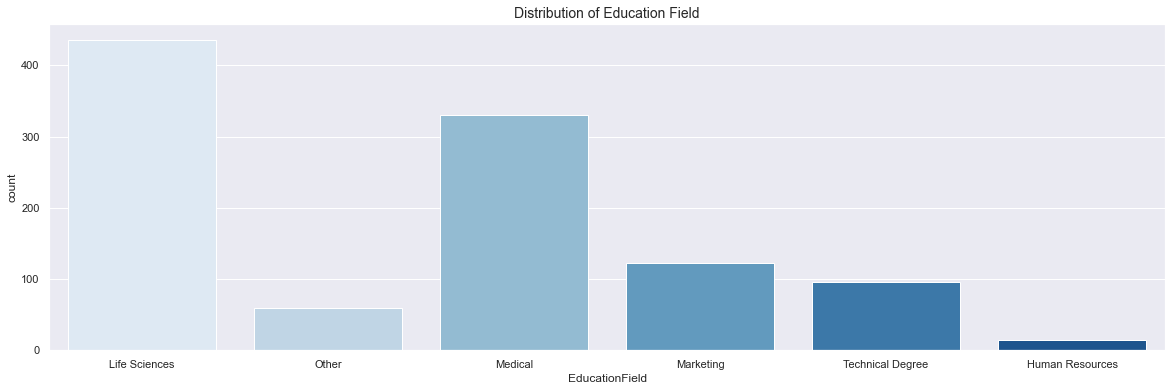

In [86]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x="EducationField", data=df, palette="Blues")
plt.title('Distribution of Education Field', fontsize=14);

In [87]:
# calculation each ratio (leaver per educational field)
df[['EducationField', 'Attrition']].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EducationField,Attrition
5,Technical Degree,0.260417
2,Marketing,0.213115
4,Other,0.169492
1,Life Sciences,0.160550
3,Medical,0.139394
0,Human Resources,0.133333


**Conclusion** As we can see, employees with a technical degree are very willing to leave (26%) followed by Marketing (21%). And employees with the field HR will stay at the company. 

### Education

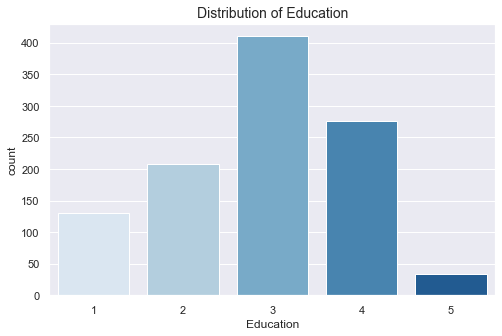

In [88]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="Education", data=df, palette="Blues")
plt.title('Distribution of Education', fontsize=14);

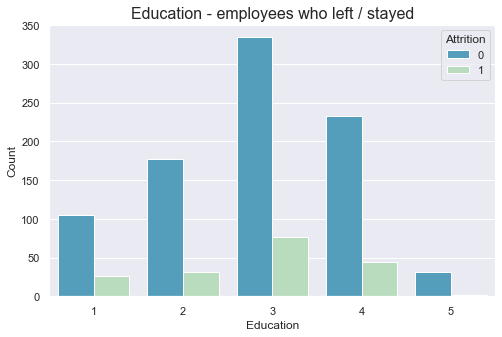

In [89]:
sns.countplot(x=df.Education, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Education - employees who left / stayed', fontsize=16)
plt.xlabel("Education")
plt.ylabel("Count");

In [90]:
# calculation each ratio (leaver per education)
df[['Education', 'Attrition']].groupby(['Education'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Education,Attrition
0,1,0.198473
2,3,0.185366
3,4,0.159420
1,2,0.149038
4,5,0.060606


**Conclusion** Sadly we can't say exactly what kind of education level we do have. We only can say that most of the employees do have a mid education level and it's the same category education level for leavers. Employees with an education of 1 are most willing to leave (20%). 

### Number companies worked 

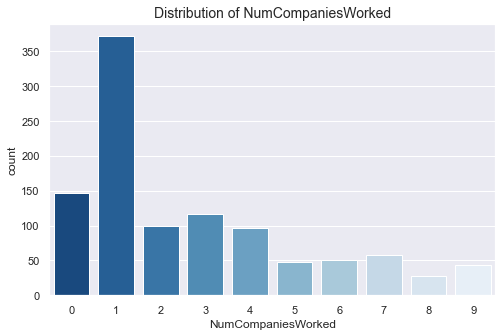

In [91]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="NumCompaniesWorked", data=df, palette="Blues_r")
plt.title('Distribution of NumCompaniesWorked', fontsize=14);

In [92]:
# calculation each ratio (leaver per number of companies worked for)
df[['NumCompaniesWorked', 'Attrition']].groupby(['NumCompaniesWorked'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,NumCompaniesWorked,Attrition
5,5,0.270833
7,7,0.224138
6,6,0.220000
9,9,0.209302
1,1,0.199461
8,8,0.178571
0,0,0.129252
4,4,0.123711
2,2,0.120000
3,3,0.094828


**Conclusion** As we can see the more companies an employee worked for, the more he/she is willing to leave. The highest risk is for employees with 5 companies (27%). 

### Total Working Years 

In [93]:
df.TotalWorkingYears.nunique()

40

In [94]:
print("The smallest number of total working years is " + str(df.TotalWorkingYears.min()))
print("The highest number of total workiung years is " + str(df.TotalWorkingYears.max()))

The smallest number of total working years is 0
The highest number of total workiung years is 40


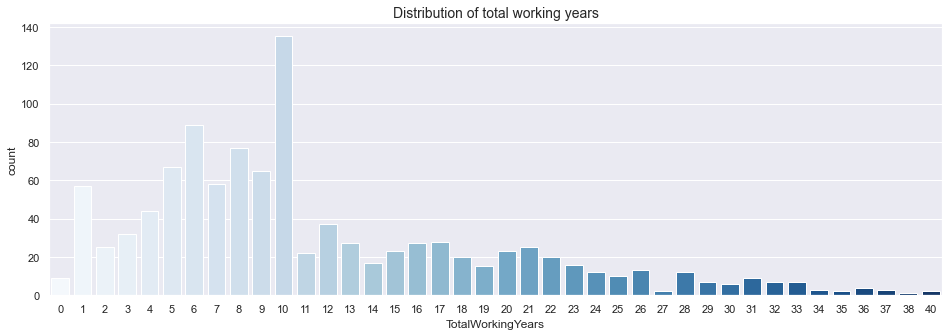

In [95]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(x="TotalWorkingYears", data=df, palette="Blues")
plt.title('Distribution of total working years', fontsize=14);

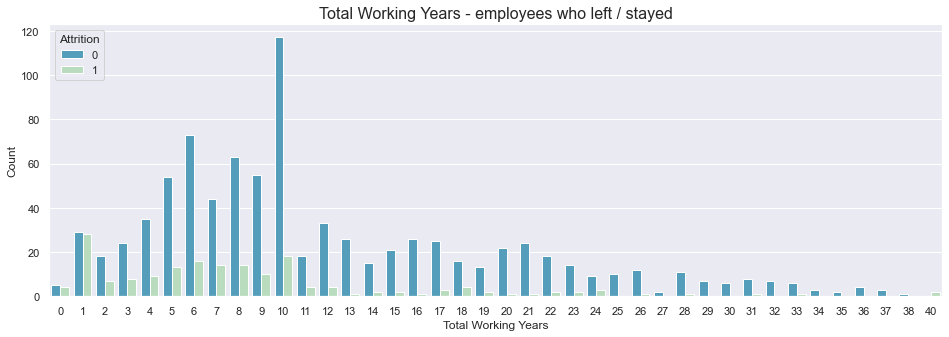

In [96]:
sns.countplot(x=df.TotalWorkingYears, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Total Working Years - employees who left / stayed', fontsize=16)
plt.xlabel("Total Working Years")
plt.ylabel("Count");

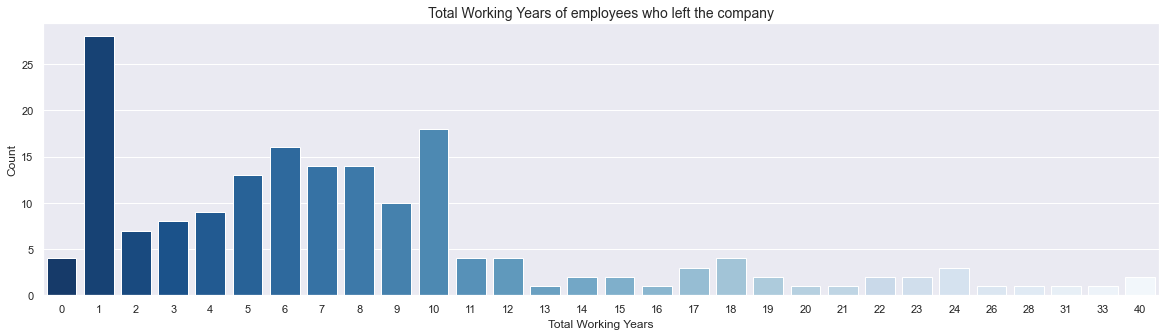

In [97]:
#plotting onle with the leaver dataframe
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="TotalWorkingYears", data=leaver, palette="Blues_r")
plt.title('Total Working Years of employees who left the company', fontsize=14);
plt.xlabel("Total Working Years", fontsize=12)
plt.ylabel("Count", fontsize=12);

In [98]:
# calculation each ratio (leaver per total working years)
df[['TotalWorkingYears', 'Attrition']].groupby(['TotalWorkingYears'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TotalWorkingYears,Attrition
39,40,1.000000
1,1,0.491228
0,0,0.444444
2,2,0.280000
3,3,0.250000
24,24,0.250000
7,7,0.241379
4,4,0.204545
18,18,0.200000
5,5,0.194030


**Conclusion** As we can see, most of the employees do have 10 years of work experience. As this plot is not very easy to read, we will create bins for the working years later on in the chapter feature engineering. But it's obvious that the ratio for employees staying or laving while they are having only 1 year of working experience is greater. In total most of the employees who are leaving only have 1 year of work experience. Followed by them who worked since 10 years. The highest risk is for employees with 40 years of experience (100%) but this might be in case of retirment. Followed by employees with 1 year (49%) and employees within their first year (44%). Also we can see that employees with a higher number of years (eg. 25, 32, 36, ....) that they are not willing to leave (0%).

### Employee Count and Employee Number

In [99]:
df.EmployeeCount.value_counts()

1    1058
Name: EmployeeCount, dtype: int64

In [100]:
df.EmployeeNumber.nunique()

1058

**Conclusion** Delete Employee Count and Employee Number later. Both of them are like an Employee-ID and note useful for the preditction.

## Satisfaction & Job Involvement Information

### Job Involvement 

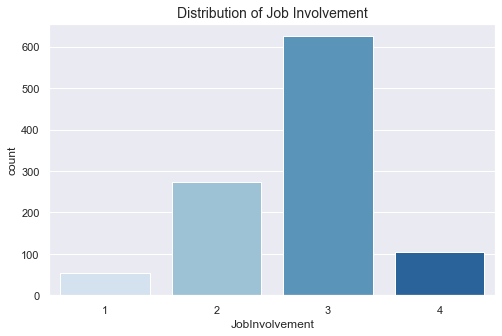

In [101]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="JobInvolvement", data=df, palette="Blues")
plt.title('Distribution of Job Involvement', fontsize=14);

In [102]:
# calculation each ratio (leaver per job involvement)
df[['JobInvolvement', 'Attrition']].groupby(['JobInvolvement'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobInvolvement,Attrition
0,1,0.400000
1,2,0.201465
2,3,0.147200
3,4,0.095238


**Conclusion** Most of the employees do have a good job involvement. Not very surprisingly, employees with a low job involvement (1) are willing to leave (40%).

### Performance Rating

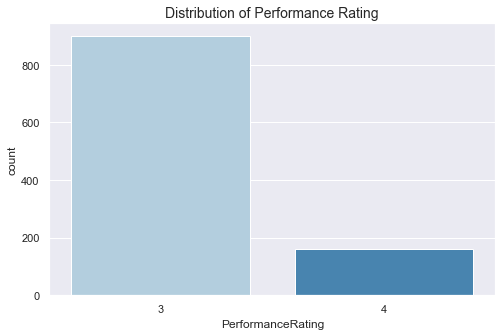

In [103]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="PerformanceRating", data=df, palette="Blues")
plt.title('Distribution of Performance Rating', fontsize=14);

**Conclusion** The performance rating is given to each employee; however, we notice that all ratings are with 3 or 4, thus making the efficacy of this measure questionable.

### Environment Satisfaction

In [104]:
df.EnvironmentSatisfaction.value_counts()

3    335
4    314
1    209
2    200
Name: EnvironmentSatisfaction, dtype: int64

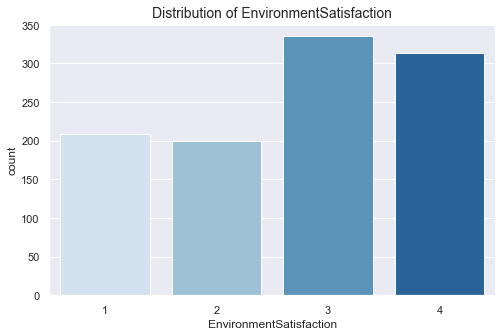

In [105]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="EnvironmentSatisfaction", data=df, palette="Blues")
plt.title('Distribution of EnvironmentSatisfaction', fontsize=14);

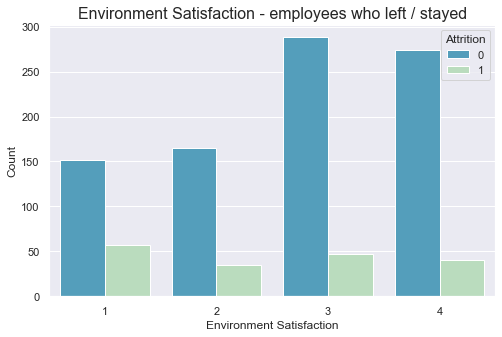

In [106]:
sns.countplot(x=df.EnvironmentSatisfaction, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Environment Satisfaction - employees who left / stayed', fontsize=16)
plt.xlabel("Environment Satisfaction")
plt.ylabel("Count");

In [107]:
# calculation each ratio (leaver per environement satisfaction)
df[['EnvironmentSatisfaction', 'Attrition']].groupby(['EnvironmentSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EnvironmentSatisfaction,Attrition
0,1,0.272727
1,2,0.175000
2,3,0.140299
3,4,0.127389


**Conclusion** As we can see we do have some kind of scale with 1 = worst and 4 = best value. Not very surprinslgy, employees with a lower environment satisfaction (1) are willing to leave (27%).

### Job Satisfaction

In [108]:
df.JobSatisfaction.value_counts()

4    340
3    318
1    205
2    195
Name: JobSatisfaction, dtype: int64

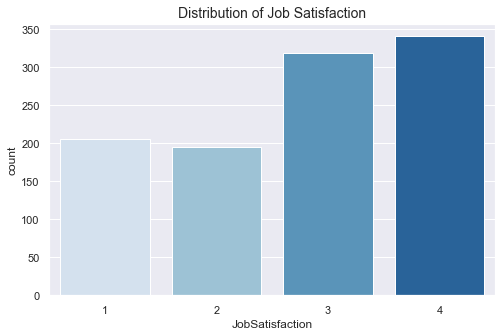

In [109]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="JobSatisfaction", data=df, palette="Blues")
plt.title('Distribution of Job Satisfaction', fontsize=14);

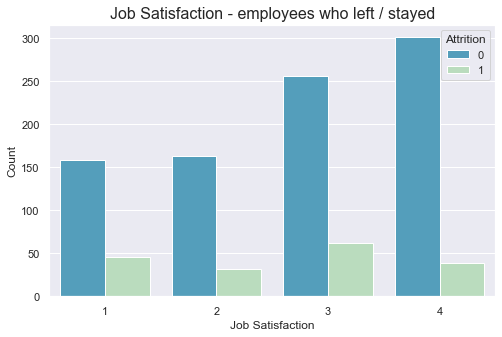

In [110]:
sns.countplot(x=df.JobSatisfaction, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Job Satisfaction - employees who left / stayed', fontsize=16)
plt.xlabel("Job Satisfaction")
plt.ylabel("Count");

In [111]:
# calculation each ratio (leaver per job satisfaction)
df[['JobSatisfaction', 'Attrition']].groupby(['JobSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobSatisfaction,Attrition
0,1,0.224390
2,3,0.194969
1,2,0.164103
3,4,0.114706


**Conclusion** Most employees are satisfied with their job. Not very suprisingly, employees with a low job satisfaction (1) are more willing to leave (22%)

### Relationship Satisfaction

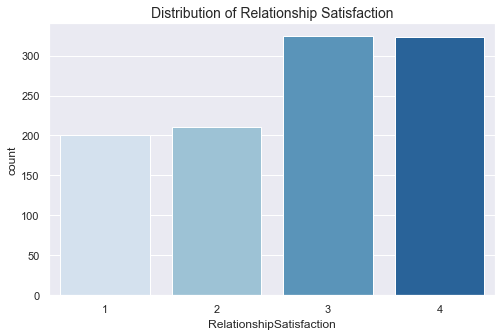

In [112]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="RelationshipSatisfaction", data=df, palette="Blues")
plt.title('Distribution of Relationship Satisfaction', fontsize=14);

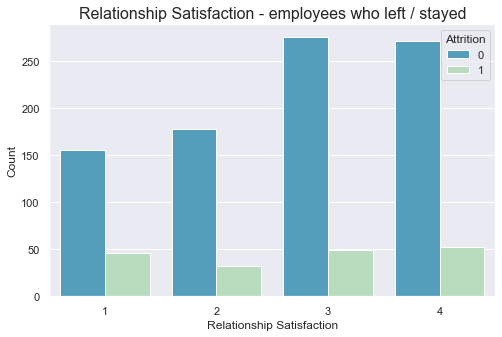

In [113]:
sns.countplot(x=df.RelationshipSatisfaction, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Relationship Satisfaction - employees who left / stayed', fontsize=16)
plt.xlabel("Relationship Satisfaction")
plt.ylabel("Count");

In [114]:
# calculation each ratio (leaver per relationship satisfaction)
df[['RelationshipSatisfaction', 'Attrition']].groupby(['RelationshipSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,RelationshipSatisfaction,Attrition
0,1,0.228856
3,4,0.160991
1,2,0.152381
2,3,0.151235


**Conclusion** Not very suprisingly, employees with a low relationship satisfaction (1) are more willing to leave (23%). But in total it seems that most employees are satisfied with thei relationship (3 and 4 do have in total the highest values).

### Work Life Balance

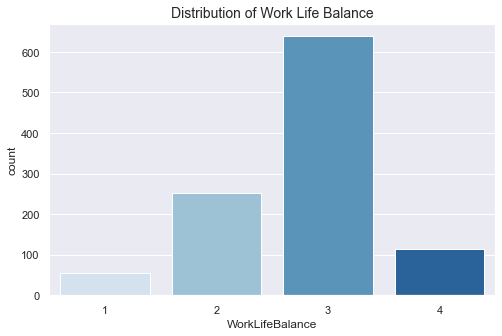

In [115]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="WorkLifeBalance", data=df, palette="Blues")
plt.title('Distribution of Work Life Balance', fontsize=14);

In [116]:
# calculation each ratio (leaver per WLB)
df[['WorkLifeBalance', 'Attrition']].groupby(['WorkLifeBalance'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,WorkLifeBalance,Attrition
0,1,0.321429
3,4,0.194690
1,2,0.179283
2,3,0.147335


**Conclusion** Not very suprisingly, employees with a low rated WLB are more willing to leave (32%). 

## Working Hours

### Standard Hours

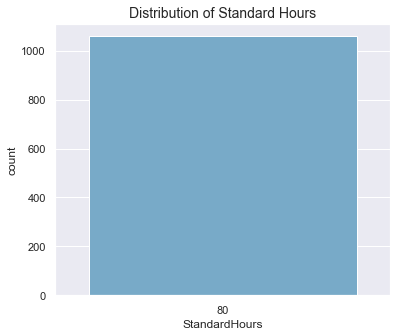

In [117]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(x="StandardHours", data=df, palette="Blues")
plt.title('Distribution of Standard Hours', fontsize=14);

In [118]:
df.StandardHours.nunique()

1

In [119]:
df.StandardHours.unique()

array([80])

**Conclusion** As we only have the value of 80 for all employees it seems not to bee a relevant feature. I think we can drop it later on. Addtionally we don't know what time frame stands behind the number of 80. Is it 80 hours for 2 weeks? 80 hours per month? 

### Over Time

In [120]:
df.OverTime.value_counts()

No     751
Yes    307
Name: OverTime, dtype: int64

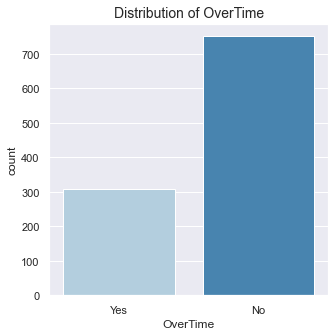

In [121]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x="OverTime", data=df, palette="Blues")
plt.title('Distribution of OverTime', fontsize=14);

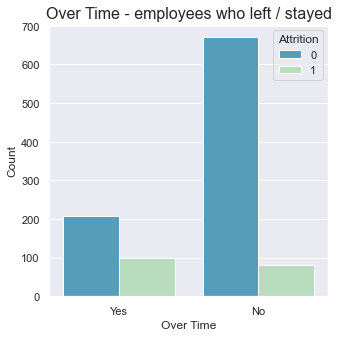

In [122]:
sns.countplot(x=df.OverTime, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Over Time - employees who left / stayed', fontsize=16)
plt.xlabel("Over Time")
plt.ylabel("Count");

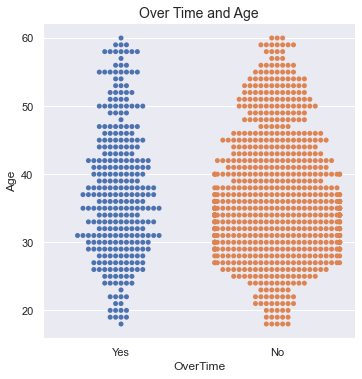

In [123]:
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x="OverTime", y="Age", kind="swarm", data=df);
plt.title('Over Time and Age', fontsize=14);

In [124]:
# calculation each ratio (leaver per Over time)
df[['OverTime', 'Attrition']].groupby(['OverTime'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,OverTime,Attrition
1,Yes,0.319218
0,No,0.107856


**Conclusion** Most of the employees (in total) don't have any over times. But we can see that employees with over time are more willing to leave (31%) than empoloyees without (11%).

## Salary and money related information

### Hourly Rate

In [125]:
df.HourlyRate.nlargest(5)

104    100
128    100
171    100
241    100
260    100
Name: HourlyRate, dtype: int64

In [126]:
df.HourlyRate.nsmallest(5)

57     30
78     30
81     30
110    30
112    30
Name: HourlyRate, dtype: int64

In [127]:
print("The smallest hourly rate is " + str(df.HourlyRate.min()))
print("The highest hourly rate is " + str(df.HourlyRate.max()))

The smallest hourly rate is 30
The highest hourly rate is 100


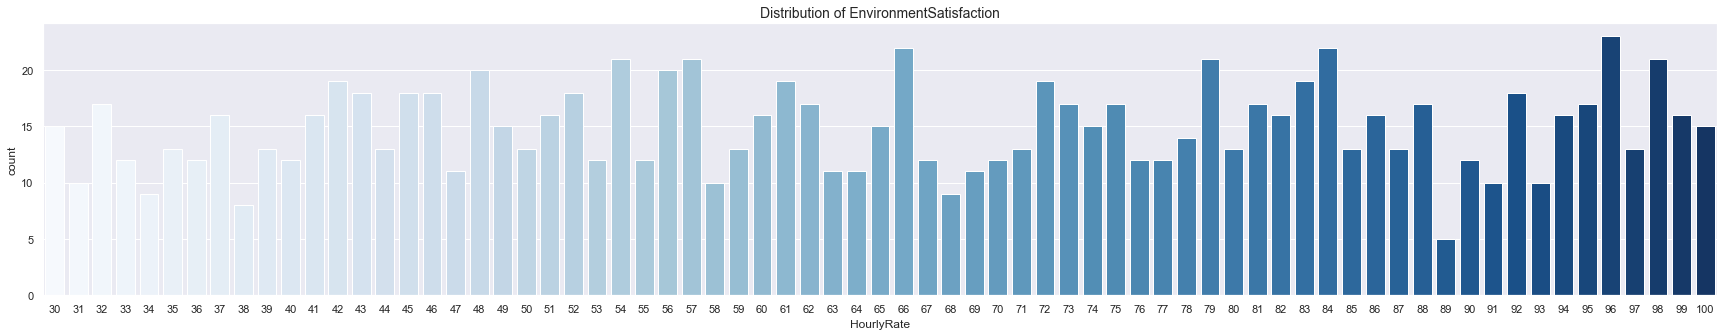

In [128]:
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x="HourlyRate", data=df, palette="Blues")
plt.title('Distribution of EnvironmentSatisfaction', fontsize=14);

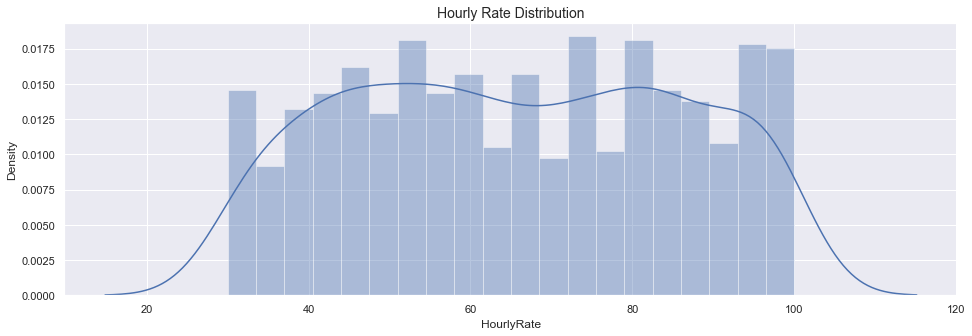

In [129]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df["HourlyRate"], bins=20)
plt.title('Hourly Rate Distribution', fontsize=14);

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

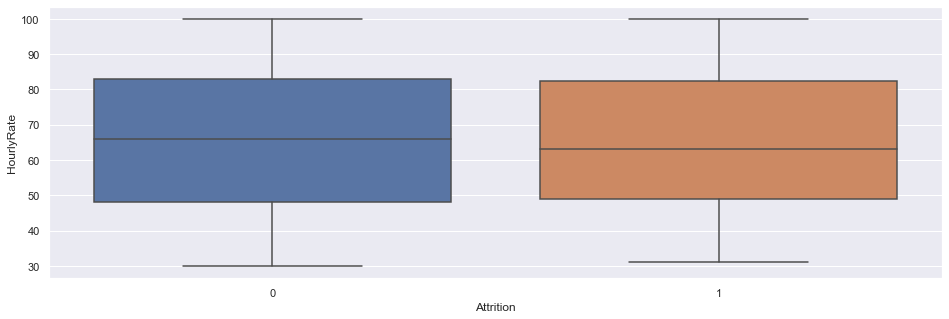

In [130]:
sns.boxplot(df['Attrition'],df['HourlyRate'])

**Conclusion** There are different types of hourly rates from 30 up to 100. There is no currency information. Maybe it make sense to create a new feature with bins. 

### Daily Rate

In [131]:
df.DailyRate.nunique()

731

In [132]:
print("The smallest daily rate is " + str(df.DailyRate.min()))
print("The highest daily rate is " + str(df.DailyRate.max()))

The smallest daily rate is 102
The highest daily rate is 1499


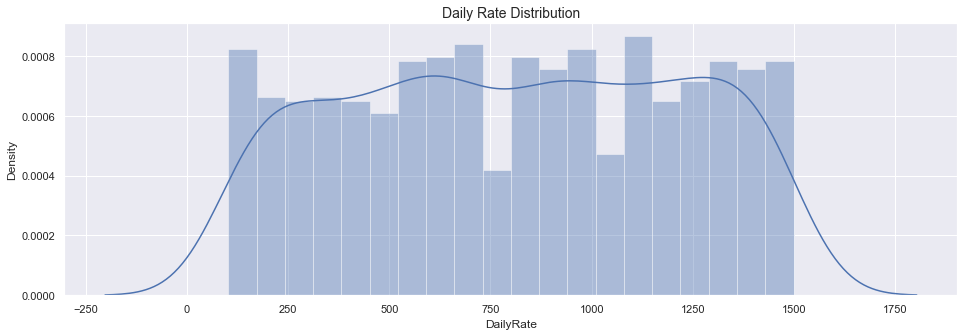

In [133]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df["DailyRate"], bins=20)
plt.title('Daily Rate Distribution', fontsize=14);

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

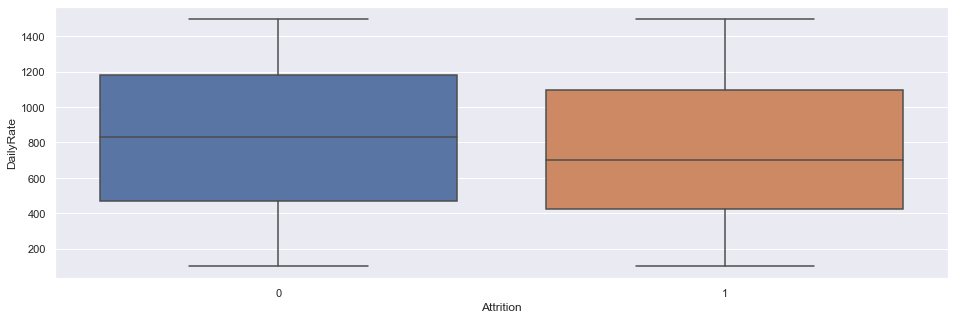

In [134]:
sns.boxplot(df['Attrition'],df['DailyRate'])

### Monthly Rate

In [135]:
df.MonthlyRate.nunique()

1038

In [136]:
print("The smallest monthly rate is " + str(df.MonthlyRate.min()))
print("The highest monthly rate is " + str(df.MonthlyRate.max()))

The smallest monthly rate is 2094
The highest monthly rate is 26999


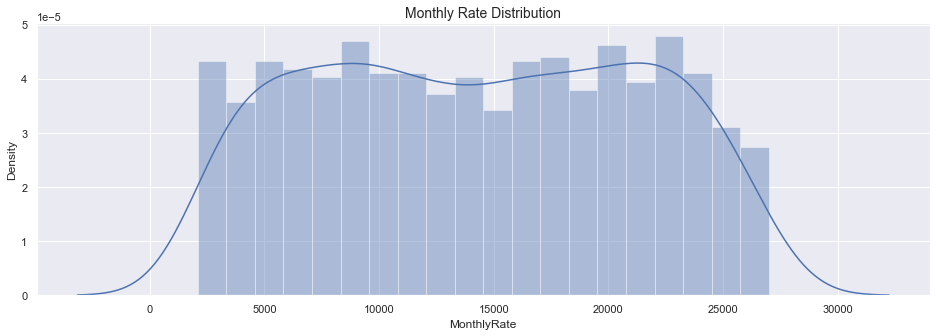

In [137]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df["MonthlyRate"], bins=20)
plt.title('Monthly Rate Distribution', fontsize=14);

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

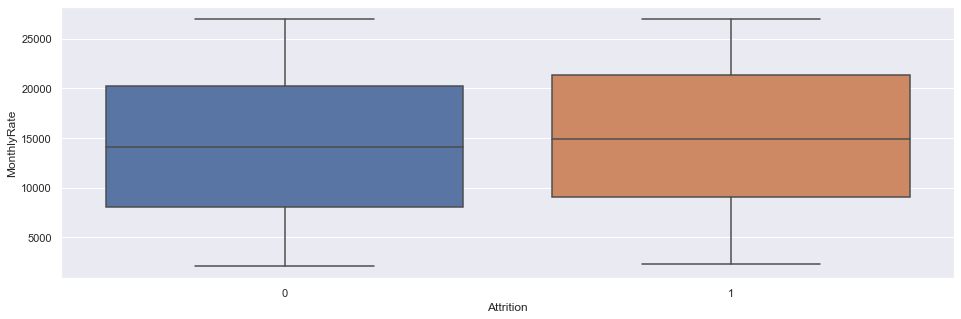

In [138]:
sns.boxplot(df['Attrition'],df['MonthlyRate'])

**Conclusion** Doesn't have much significance as it's almost uniform attrition at different daily, monthly and hourly rate. I think these are just features extracted from salary itself.

### Monthly Income

In [139]:
df.MonthlyIncome.nunique()

991

In [140]:
print("The smallest monthly income is " + str(df.MonthlyIncome.min()))
print("The highest monthly income is " + str(df.MonthlyIncome.max()))

The smallest monthly income is 1009
The highest monthly income is 19999


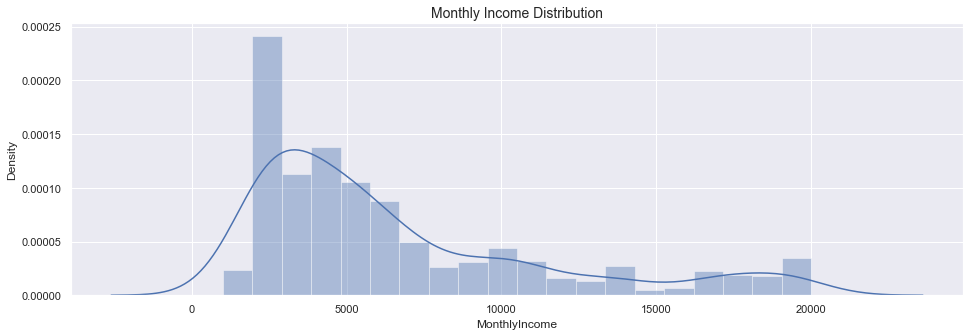

In [141]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df["MonthlyIncome"], bins=20)
plt.title('Monthly Income Distribution', fontsize=14);

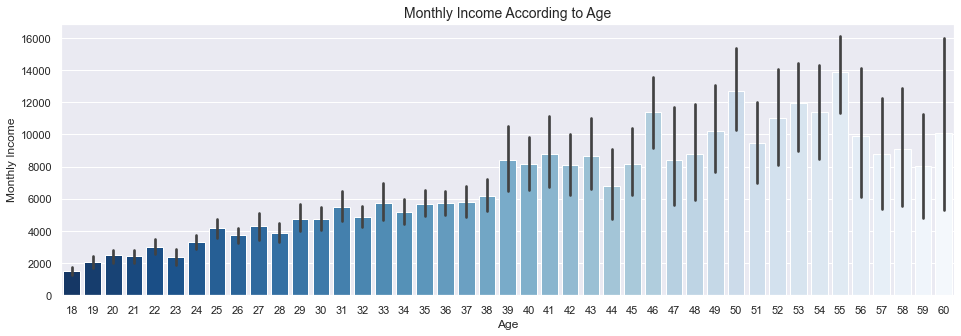

In [142]:
sns.barplot(x=df.Age,y=df.MonthlyIncome,palette = "Blues_r")
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age", fontsize=14)
plt.show()

**Conclusion** To get a better understanding, we'll create a new feature "monthly income bins". 

### Stock Option Level

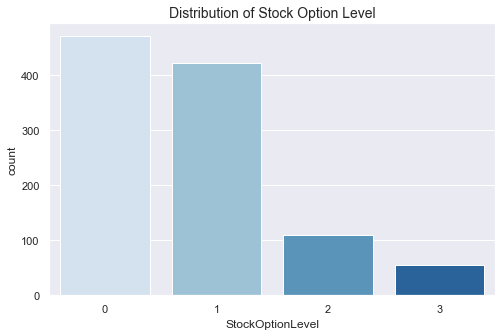

In [143]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="StockOptionLevel", data=df, palette="Blues")
plt.title('Distribution of Stock Option Level', fontsize=14);

In [144]:
# calculation each ratio (leaver per stock option)
df[['StockOptionLevel', 'Attrition']].groupby(['StockOptionLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,StockOptionLevel,Attrition
0,0,0.256900
3,3,0.145455
1,1,0.099526
2,2,0.072727


**Conclusion** Most employees do have a low stock option level and those employees are more willing to leave (26%).

### Percent Salary Hike

In [145]:
df.PercentSalaryHike.nunique()

15

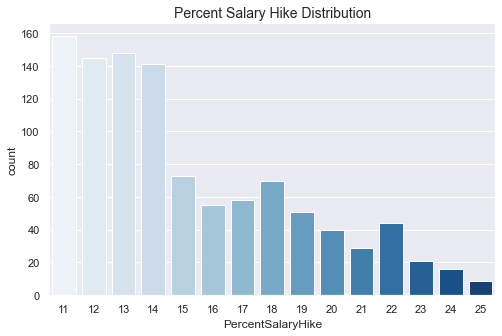

In [146]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="PercentSalaryHike", data=df, palette="Blues")
plt.title('Percent Salary Hike Distribution', fontsize=14);

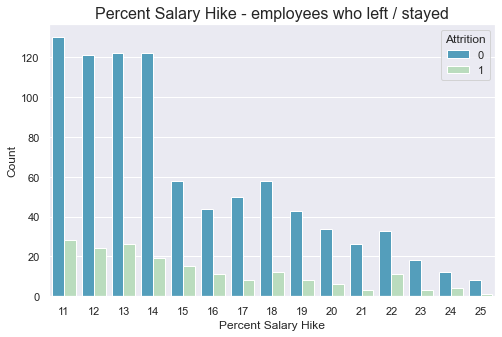

In [147]:
sns.countplot(x=df.PercentSalaryHike, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Percent Salary Hike - employees who left / stayed', fontsize=16)
plt.xlabel("Percent Salary Hike")
plt.ylabel("Count");

In [148]:
# calculation each ratio (leaver per % salary hike)
df[['PercentSalaryHike', 'Attrition']].groupby(['PercentSalaryHike'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,PercentSalaryHike,Attrition
11,22,0.250000
13,24,0.250000
4,15,0.205479
5,16,0.200000
0,11,0.177215
2,13,0.175676
7,18,0.171429
1,12,0.165517
8,19,0.156863
9,20,0.150000


**Conclusion** Most employees got a salary hike of 11%. But it's interesting that employees with a higher value of salary hike are more willing to leave. For example 22% or 24% salary hike leads to a risk of attrition of 25%. 

### Training Times Last Year

In [149]:
df.TrainingTimesLastYear.nunique()

7

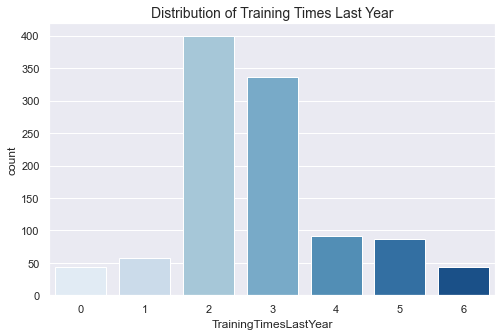

In [150]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="TrainingTimesLastYear", data=df, palette="Blues")
plt.title('Distribution of Training Times Last Year', fontsize=14);

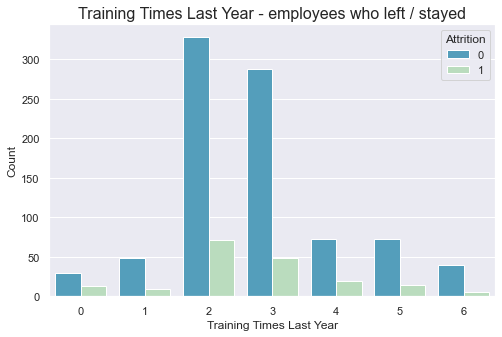

In [151]:
sns.countplot(x=df.TrainingTimesLastYear, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Training Times Last Year - employees who left / stayed', fontsize=16)
plt.xlabel("Training Times Last Year")
plt.ylabel("Count");

In [152]:
df.groupby("TrainingTimesLastYear")["Attrition"].value_counts(normalize=True).mul(100)

TrainingTimesLastYear  Attrition
0                      0            69.767442
                       1            30.232558
1                      0            84.210526
                       1            15.789474
2                      0            82.205514
                       1            17.794486
3                      0            85.714286
                       1            14.285714
4                      0            79.347826
                       1            20.652174
5                      0            83.908046
                       1            16.091954
6                      0            88.636364
                       1            11.363636
Name: Attrition, dtype: float64

In [153]:
# calculation each ratio (leaver per TrainingTimesLastYear)
df[['TrainingTimesLastYear', 'Attrition']].groupby(['TrainingTimesLastYear'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.302326
4,4,0.206522
2,2,0.177945
5,5,0.160920
1,1,0.157895
3,3,0.142857
6,6,0.113636


**Conclusion** As we can see most of the employees did have a training two or three times a year. When we take a closer look at the number of employees who left, we see that employees with zero trainings are most willing to leave (30%) followed by employees with 4 trainings (21%). 

# Feature Engineering

After the exploration into the dataset, I'll start with the Feature engineering as well as the numerically encoding the categorical values in our dataset. We'll create new features and relationships from the current features that we have. 

## Create new feature hourly rate bins

In [154]:
# make bins for horuly rate
hourly_rate_bins = np.arange(0, 110,10)
hourly_rate_series = pd.cut(df['HourlyRate'], bins=hourly_rate_bins, 
                              labels=hourly_rate_bins[:-1])
hourly_rate_series.name = 'hourly_rate_bin'
df = df.join(hourly_rate_series)

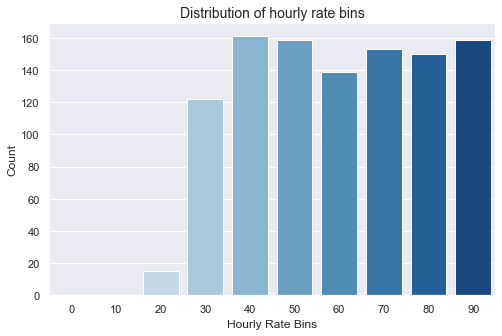

In [155]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="hourly_rate_bin", data=df, palette="Blues")
plt.title('Distribution of hourly rate bins', fontsize=14);
plt.xlabel("Hourly Rate Bins")
plt.ylabel("Count");

In [156]:
df.hourly_rate_bin.value_counts()

40    161
90    159
50    159
70    153
80    150
60    139
30    122
20     15
10      0
0       0
Name: hourly_rate_bin, dtype: int64

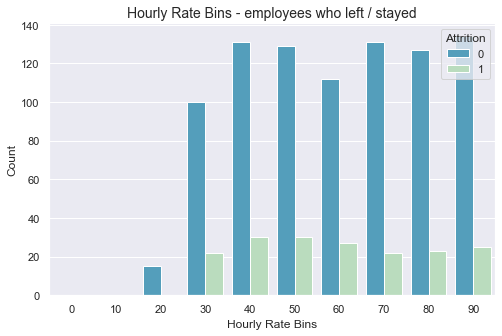

In [157]:
sns.countplot(x=df.hourly_rate_bin, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Hourly Rate Bins - employees who left / stayed', fontsize=14)
plt.xlabel("Hourly Rate Bins")
plt.ylabel("Count");

In [158]:
# calculation each ratio (leaver per hourly rate bin)
df[['hourly_rate_bin', 'Attrition']].groupby(['hourly_rate_bin'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,hourly_rate_bin,Attrition
6,60,0.194245
5,50,0.188679
4,40,0.186335
3,30,0.180328
9,90,0.157233
8,80,0.153333
7,70,0.143791
2,20,0.000000
0,0,NaN
1,10,NaN


**Conclusion** Most of the employees do have a hourly rate between 40 and 50 followed by 90 to 100. Most employees with a horly rate bin 60 - 70 are most willing to leave 19%. And employees with a low value won't leave.

## Create new feature: monthly income bins

In [159]:
# make bins for horuly rate
monthlyincome_bins = np.arange(0, 20000, 2000)
monthlyincome_series = pd.cut(df['MonthlyIncome'], bins=monthlyincome_bins, 
                              labels=monthlyincome_bins[:-1])
monthlyincome_series.name = 'monthlyincome_bin'
df = df.join(monthlyincome_series)

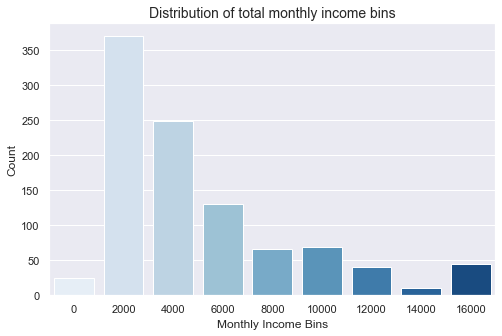

In [160]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="monthlyincome_bin", data=df, palette="Blues")
plt.title('Distribution of total monthly income bins', fontsize=14);
plt.xlabel("Monthly Income Bins")
plt.ylabel("Count");

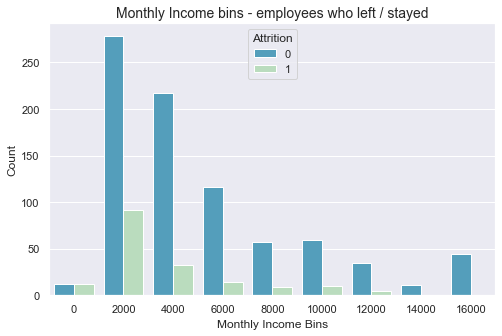

In [161]:
sns.countplot(x=df.monthlyincome_bin, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Monthly Income bins - employees who left / stayed', fontsize=14)
plt.xlabel("Monthly Income Bins")
plt.ylabel("Count");

In [162]:
# calculation each ratio (leaver per monthly income bin)
df[['monthlyincome_bin', 'Attrition']].groupby(['monthlyincome_bin'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,monthlyincome_bin,Attrition
0,0,0.500000
1,2000,0.248649
5,10000,0.144928
4,8000,0.136364
2,4000,0.128514
6,12000,0.125000
3,6000,0.107692
7,14000,0.000000
8,16000,0.000000


**Conclusion** In total most employees do have a monthly income bin aroun 2000 - 4000. People having a small Monthly Income bin (0 - 2000) do have a higher risk of leaving the company (50%). Employees with a bin from 14000 up don't have any risk of leaving (0%).

## Create new feature total working year bins

In [163]:
# make bins for horuly rate
totalworkingyears_bins = np.arange(0, 50, 5)
totalworkingyears_series = pd.cut(df['TotalWorkingYears'], bins=totalworkingyears_bins, 
                              labels=totalworkingyears_bins[:-1])
totalworkingyears_series.name = 'totalworkingyears_bin'
df = df.join(totalworkingyears_series)

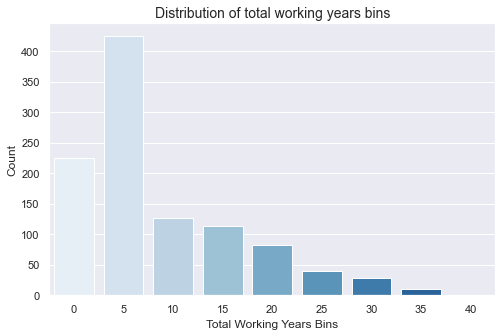

In [164]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="totalworkingyears_bin", data=df, palette="Blues")
plt.title('Distribution of total working years bins', fontsize=14);
plt.xlabel("Total Working Years Bins")
plt.ylabel("Count");

In [165]:
df.totalworkingyears_bin.value_counts()

5     424
0     225
10    126
15    113
20     83
25     40
30     28
35     10
40      0
Name: totalworkingyears_bin, dtype: int64

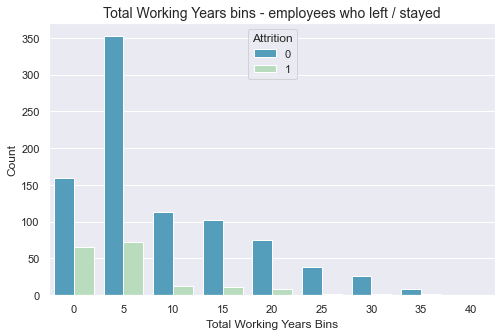

In [166]:
sns.countplot(x=df.totalworkingyears_bin, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Total Working Years bins - employees who left / stayed', fontsize=14)
plt.xlabel("Total Working Years Bins")
plt.ylabel("Count");

In [167]:
# calculation each ratio (leaver per total working years bin)
df[['totalworkingyears_bin', 'Attrition']].groupby(['totalworkingyears_bin'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,totalworkingyears_bin,Attrition
0,0,0.288889
7,35,0.200000
1,5,0.169811
2,10,0.103175
3,15,0.097345
4,20,0.096386
6,30,0.071429
5,25,0.050000
8,40,NaN


**Conclusion** As we can see most of the employees do have a working experience of 5 to 10 years. And employees with only a short ammount of working years are most willing to leave (29%).

## Create new feature years at company bins

In [168]:
# make bins for horuly rate
yearsatcompany_bins = np.arange(0, 40, 5)
yearsatcompany_series = pd.cut(df['YearsAtCompany'], bins=yearsatcompany_bins, 
                              labels=yearsatcompany_bins[:-1])
yearsatcompany_series.name = 'yearsatcompany_bin'
df = df.join(yearsatcompany_series)

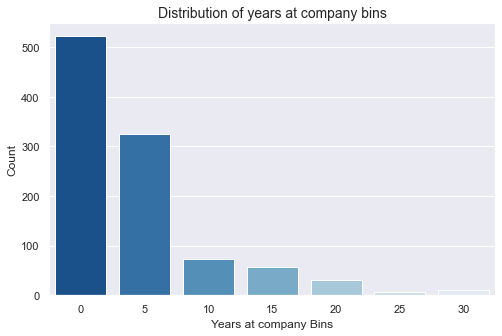

In [169]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="yearsatcompany_bin", data=df, palette="Blues_r")
plt.title('Distribution of years at company bins', fontsize=14);
plt.xlabel("Years at company Bins")
plt.ylabel("Count");

In [170]:
df.yearsatcompany_bin.value_counts()

0     522
5     325
10     74
15     56
20     30
30     10
25      7
Name: yearsatcompany_bin, dtype: int64

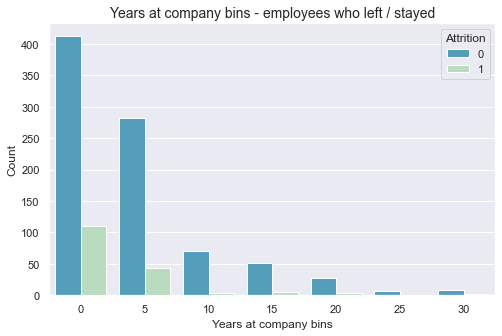

In [171]:
sns.countplot(x=df.yearsatcompany_bin, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Years at company bins - employees who left / stayed', fontsize=14)
plt.xlabel("Years at company bins")
plt.ylabel("Count");

In [172]:
# calculation each ratio (leaver per total working years bin)
df[['yearsatcompany_bin', 'Attrition']].groupby(['yearsatcompany_bin'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,yearsatcompany_bin,Attrition
0,0,0.210728
6,30,0.200000
1,5,0.132308
4,20,0.100000
3,15,0.089286
2,10,0.054054
5,25,0.000000


**Conclusion** As we can see most of the employees in total stayed at the company for around 1 to 5 years. But it's interesting that employees with a high number and a low number are most willing to leave. 35-40 years at a company (33%) and 0-5 years = 21%.

## Create a new feature 'overall satisfaction'

Out of the afeatures EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction I'll build the sum to get a new feature 'overall satisfaction'.  

In [173]:
# create overall satisfaction
overall_satisfaction = df.EnvironmentSatisfaction + df.JobSatisfaction + df.RelationshipSatisfaction + df.JobInvolvement

In [174]:
overall_satisfaction.name = 'overall_satisfaction'
df = df.join(overall_satisfaction)

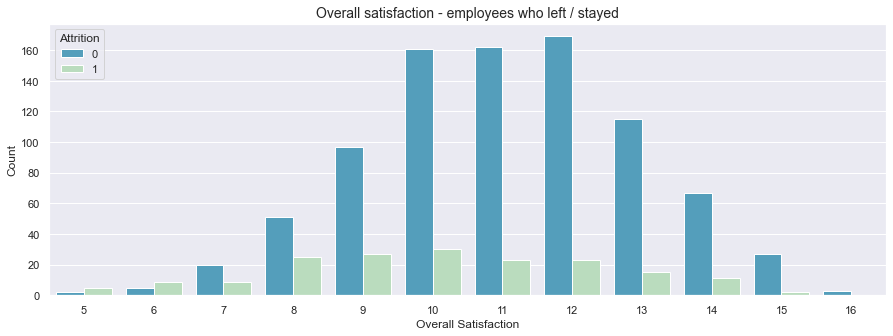

In [175]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=df.overall_satisfaction, data=df, hue='Attrition', palette="GnBu_r")
plt.title('Overall satisfaction - employees who left / stayed', fontsize=14)
plt.xlabel("Overall Satisfaction")
plt.ylabel("Count");

In [176]:
# calculation each ratio (leaver per overall satisfaction)
df[['overall_satisfaction', 'Attrition']].groupby(['overall_satisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,overall_satisfaction,Attrition
0,5,0.714286
1,6,0.642857
3,8,0.328947
2,7,0.310345
4,9,0.217742
5,10,0.157068
9,14,0.141026
6,11,0.124324
7,12,0.119792
8,13,0.115385


Not very surprinsgly, employees with a low satisfaction of 5 or 6 are highly motivated to leave the company (71% and 64%). 

# Summary after EDA

**Target Variable:**
- Nearly 83% of the employees stayed and 17% left the company
- **Imbalanced dataset**: 879 employees did not leave the organization while 179 did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

**The following list highlights the main thoughts that emerged from this analysis:**

- **JobRole** Most of our employees at the company are working as a Sales Executive (232). In total, most employees who left the company worked as a Laboratory Technician (49) followed by Sales Executives (39). In relation 43% of the Sales Representatives left the company, followed by 26% of the Laboratory Technicians.
- **JobLevel** In total most employees who left had a Job Level of 1 and the risk fo attrition is higher (27%). Further more we can see that employees with a higher job level (4 and 5) are not willing to leave a company.
- **Department** Sales (21%) and HR (16%) departments have higher attrition rate than R&D (15%) but in total, most employees who left worked at the Researche & Development Department.
- **Years in current role**: Most employees are working in their current role for 2 years followed by 7 years. Employees who are in their current role for 15years are very willing to leave the company followed by freshers (0 or 2 years). Furthermore it seems that when an employees stas in a current role for a very long time, they are not so willing to leave the company.
- **Years at company** As we can see, most of the employees work for 5 years for the company followed by 1 year. Additionally we can see, in total most employees leave in their second year and if an employee stays for longer at a company they are not so willing to leace. There is just on piek after 10 years. So it seems freshers at the company have higher attrition rate. But if we take a closer look at the percentage ratio it comes out that employees who stayed for a very long time are willing to leave (40 years = 100% and 32 years = 50%) and emoployees who stayed for a short time (First year = 35% and after 1 year = 34%)
- **Years with current manager** It's interesting that we can see most employees stayed for 2 years with their current manager and that there is a higher number for employees who stayed for 7 years with their current manager. Employees who stayed for 14 years with their current manager have a 100% chance of leaveing the comapny followed by employees in their first year (30%).
- **Years since last promotion** As we can see most employees (in total) left the company had their last promotion the last year (1 year). At this stage it's uncleare if the employee just got a promotion and left the company a short time after it. Or if the employee left the company in the first year, before they got a promotion. At a second point we can see that there is an higher value after 7 years. Employees who got their last promotion 13 years ago are most willing to leave (28%) followed by 7 years (25%) and 15 years (23%).
- **Business Travel**: Most of the employees who left, travelled from time to time (rarely) But we also can see that employees who travelled more frequently have much higher attrition rate than others (25%).
- **Gender** We can see that we do have 41.4% female employees and 58.6% male employees. Males (17%) have a slightly higher attrition rate than woman (16%).
- **Age** Most employees who left, wre at the mid agers ; 31 followed by 29. As we can see, all our employees are over 18. The average age of females is 37.39 and for males is 36.81 and both distributions are similar.
- **Maritial Status** In total, most of the employees are married. But people with Marital Status as Single have much higher chance of attrition (27%) - Married (13%) and Divorced (10%).
- **Distance from home** It's seems that most of the employees do live close to the company. 50% of the employees do have a distance of 7. Unfortunately we don't know if it's kilometers or miles. Furthermore we can see that employees who have a long way to work are more willing to leave a company (Distance From Home 12 = 38%).
- **Educational field**: AS we can see, employees with a technical degree are very willing to leave (26%) followed by Marketing (21%). And employees with the field HR will stay at the company.
- **Education** Sadly we can't say exactly what kind of education level we do have. We only can say that most of the employees do have a mid education level and it's the same category education level for leavers. Employees with an education of 1 are most willing to leave (20%).
- **Number of companies worked for** As we can see the more companies an employee worked for, the more he/she is willing to leave. The highest risk is for employees with 5 companies (27%). Employees that were in their first, third fourth or fifth job had a low attrition rate.
- **Total Working years** As we can see, most of the employees do have 10 years of work experience. As this plot is not very easy to read, we will create bins for the working years later on in the chapter feature engineering. But it's obvious that the ratio for employees staying or laving while they are having only 1 year of working experience is greater. In total most of the employees who are leaving only have 1 year of work experience. Followed by them who worked since 10 years. The highest risk is for employees with 40 years of experience (100%) but this might be in case of retirment. Followed by employees with 1 year (49%) and employees within their worst year (44%). Also we can see trhat employees with a higher number of year (eg. 25, 32, 36, ....) they are not willing to leave (0%). As we can see most of the employees do have a working experience of 5 to 10 years. And employees with only a short ammount of working years are most willing to leave (29%).
- **Job Involvement** Employees that were not involved in their work tended to leave.
- **Environment Satisfaction** As we can see we do have some kind of scale with 1 = worst and 4 = best value. Not very surprinslgy, employees with a lower environment satisfaction (1) are willing to leave (27%).
- **Job Satisfaction** Most employees are stisfied with their job. Not very suprisingly, employees with a low job satisfaction (1) are more willing to leave (22%)
- **Relationship Satisdfaction** Not very suprisingly, employees with a low relationship satisfaction (1) are more willing to leave (23%). But in total it seems that most employees are satisfied with thei relationship (3 and 4 do have in total the highest values).
- **Work Life Balance** Not very suprisingly, employees with a low rated WLB are more willing to leave (32%).
- **Overall Satisfaction** Not very surprinsgly, employees with a low satisfaction of 5 or 6 are highly motivated to leave the company (71% and 64%). So I came up with the assumption that employees that were not satisfied in the company, that were very unhappy in their team and that were not happy with their work environment were more likely to leave.
- **Over Time** Most of the employees (in total) don't have any over times. Overtime had a negative effect on attrition. We noticed that employees were more likely to leave when they did overtime (31%) compared to empoloyees without (11%).
- **Stock Option Level**: Most employees do have a low stock option level and those employees are more willing to leave (26%).
- **Percent Salary Hike** Most employees got a salary hike of 11%. But it's interesting that employees with a higher value of salary hike are more willing to leave. For example 22% or 24% salary hike leads to a risk of attrition of 25%.
- **Training times last year** As we can see most of the employees did have a training two or three times a year. When we take a closer look at the number of employees who left, we see that employees with zero trainings are most willing to leave (30%) followed by employees with 4 trainings (21%). I noticed that the attrition rate for the employees that received no training was around 30%, compared to values that range from 10% to 15% for employees that did receive some training.
- **Hourly Rate** Most of the employees do have a hourly rate between 40 and 50 followed by 90 to 100. Most employees with a horly rate bin 60 - 70 are most willing to leave 19%. And employees with a low value won't leave.
- **Monthly Income** In total most employees do have a monthly income bin aroun 2000 - 4000. People having a small Monthly Income bin (0 - 2000) do have a higher risk of leaving the company (50%). Employees with a bin from 14000 up don't have any risk of leaving (0%).

# Prepare for modeling

It is possible to go on with numerous other studies that could have been carried out on this data. But having gained some insight on the characteristics of this dataset and having performed a quiet well exploratory data analysis and simple feature engineering we are now ready to proceed onto building our models. 

First of all I'll engineer the data so that these models could be executed.
As a first step, the data is ‘cleaned’ from redundant information and the numerical and ctagorical features were set. The categorical features are coded in a numerical equivalent. The result of this step is saved in a file. The data is split in train and test sets, where an 80/20 split was applied. The output feature, or the ‘Attrition’ field was also extracted and saved in another file, so that an X and Y files were created for both training and testing sets.

Finally I'll start with a Base Model with several classification models, namely:

* Random Forest
* Logistic Regression
* K-Nearest Neighbours
* Decision Tree
* AdaBoost
* XGBoost

## Check Correlation

In this step I'll check again the correlation. Focused on the independence between our target variable and independent variables. And I'll check the multi collinearity, which refers to the strong relationship or correlation between to input variables.

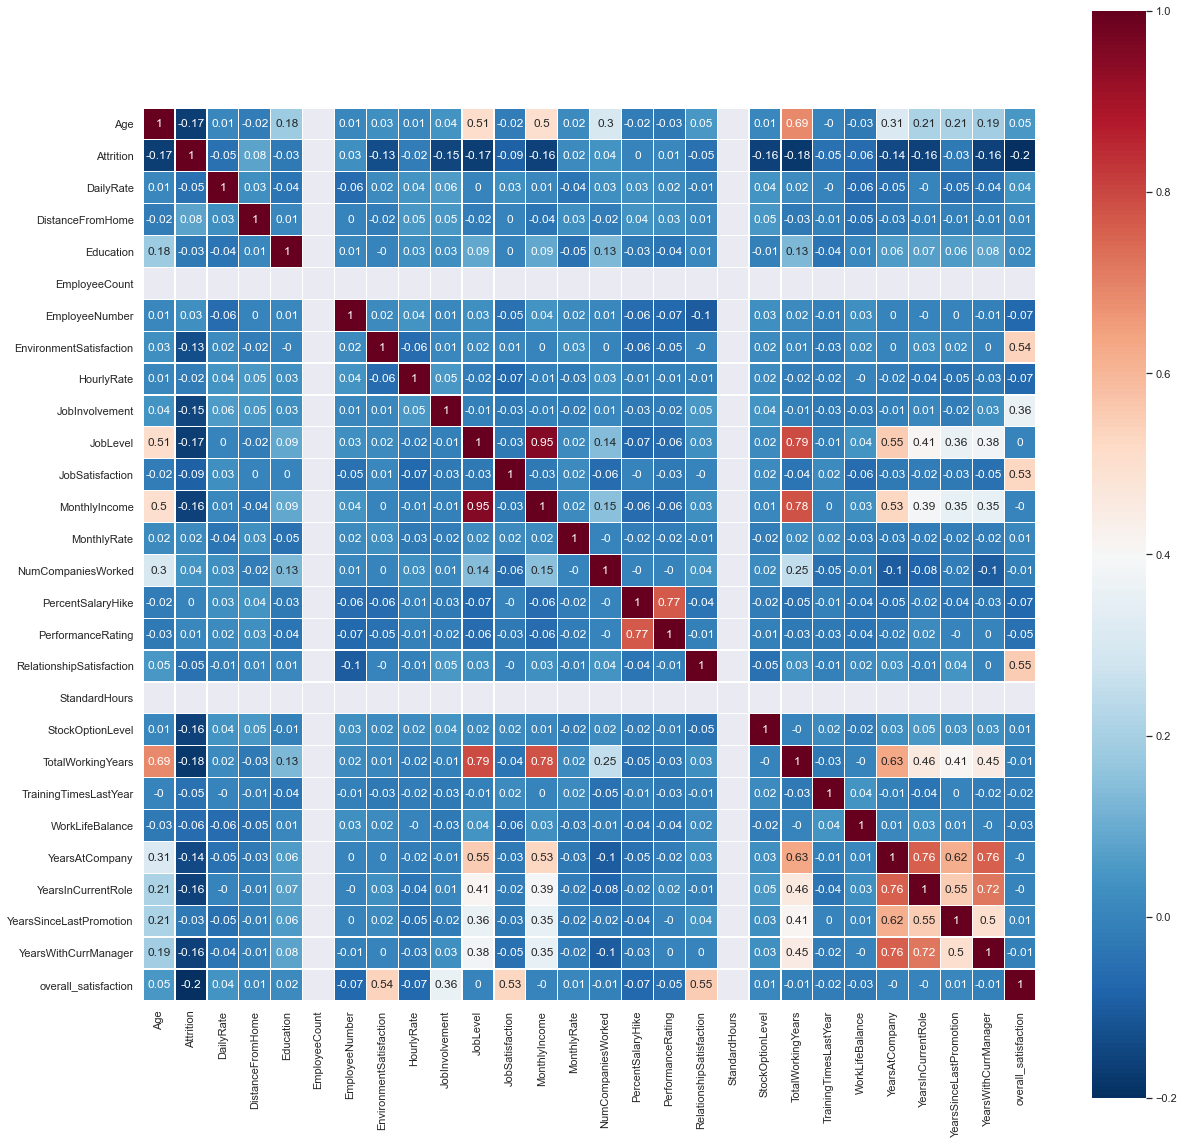

In [177]:
# heatmap - finding variables which are useful for prediction
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='RdBu_r',linewidths=0.2,square=True);

<AxesSubplot:>

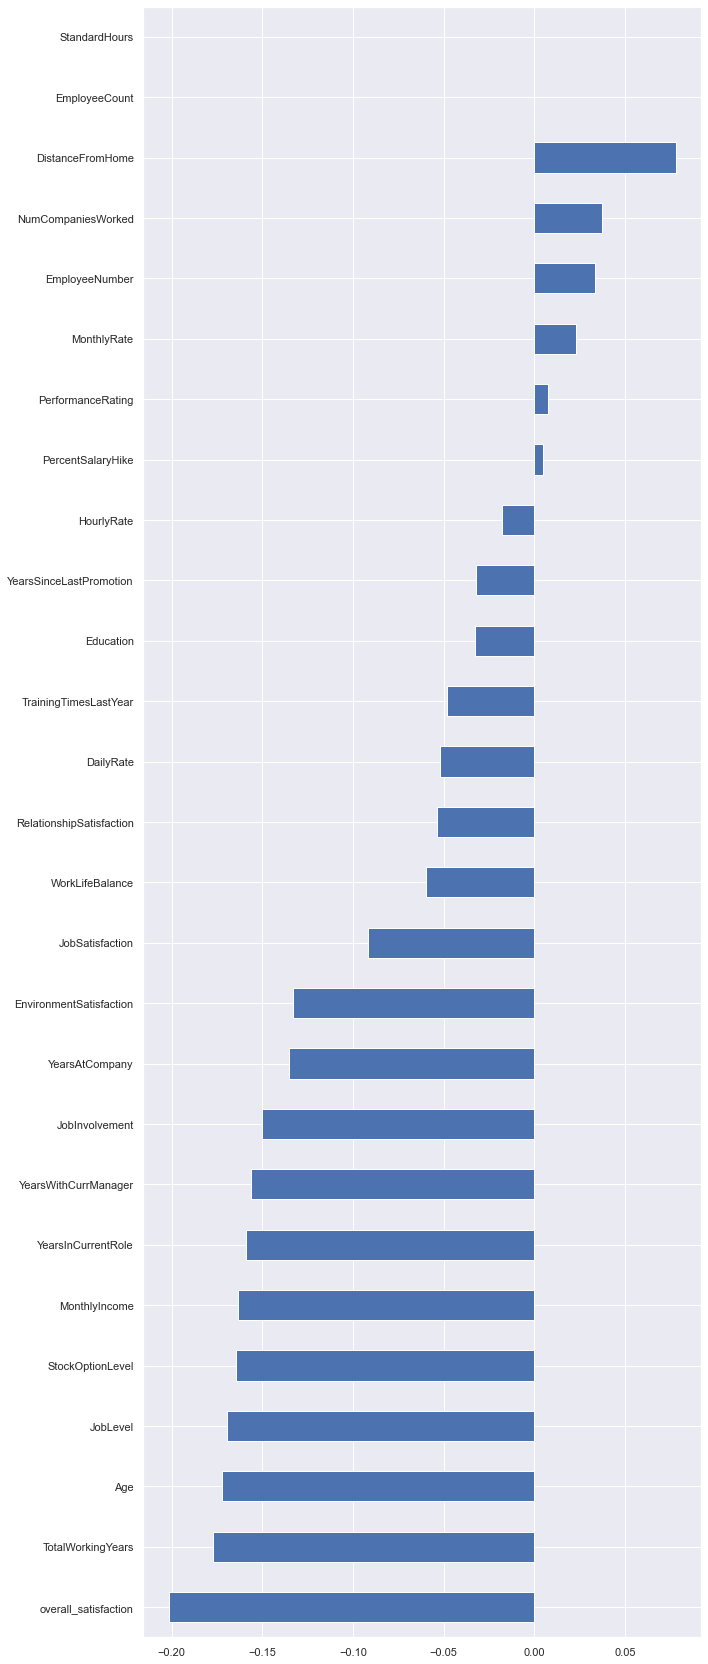

In [178]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

Based on our analysis, we remove the following variables:
* **JobLevel**: 0.95 correlation coefficient with MonthlyIncome and 0.79 with TotalWorkingYears.
* **TotalWorkingYears**: 0.77 correlation with MonthlyIncome.
* **YearsWithCurrentManager**: 0.76 correlation with YearsAtCompany

Also we can see that there is a high positiv correlation between Attrition and "OverTime_yes", "MaritalStatus_Single" and "montlyincome_bin_2000". And a high negative correlation betweeen Attirtion and "Age", "overall_satisfaction" and "Years in Current Role". 

## Drop features

In [179]:
df.dtypes

Age                            int64
Attrition                      int64
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

We noticed that EmployeeCount, Over18 and StandardHours have only one unique values and EmployeeNumber has 1470 unique values. This features aren't useful for us. And we noticed that there is some kind of multi collinearity for the features "JobLevel", "TotalWorkingYears" and "YearsWithCurrentManager". So we are going to drop those columns.

In [180]:
new_df = df.drop(["Over18", "EmployeeNumber", "EmployeeCount", "StandardHours", "JobLevel", "TotalWorkingYears", "YearsWithCurrManager"], axis=1)

## seperate the numerical and categorical columns

In [181]:
categorical = new_df.select_dtypes(include = ['object', 'category'])
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'hourly_rate_bin', 'monthlyincome_bin',
       'totalworkingyears_bin', 'yearsatcompany_bin'],
      dtype='object')


In [182]:
numerical = new_df.select_dtypes(include=['float64','int64'])
print(numerical.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'overall_satisfaction'],
      dtype='object')


## Get Dummies

In [183]:
df_cat = pd.get_dummies(categorical, drop_first=True)

In [184]:
df_cat.head(2)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,totalworkingyears_bin_25,totalworkingyears_bin_30,totalworkingyears_bin_35,totalworkingyears_bin_40,yearsatcompany_bin_5,yearsatcompany_bin_10,yearsatcompany_bin_15,yearsatcompany_bin_20,yearsatcompany_bin_25,yearsatcompany_bin_30
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [185]:
numerical.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,overall_satisfaction
0,41,1,1102,1,2,2,94,3,4,5993,...,11,3,1,0,0,1,6,4,0,10
1,49,0,279,8,1,3,61,2,2,5130,...,23,4,4,1,3,3,10,7,1,11


Having encoded our categorical columns as well as engineering and created some new features from the numerical data, we can now proceed to merging both dataframes into a final set with which we will train and test our models on.

In [186]:
# Concat the two dataframes together 
df_final = pd.concat([numerical,df_cat], axis=1)

## sampling / handle imbalanced data

An imbalanced classification problem is what we face when there is a severe skew in the class distribution of our training data. In this case we do have inly a short number of employees who left the company. The reason imbalced data is an issue is because the minority class (employees who left) is the class that we are most interested in. 

So we'll try random oversampling. Random oversampling includes selecting random examples from the minority class with replacement and supplementing the training data with multiple copies of this instance, hence it is possible that a single instance may be selected multiple times.

1    879
0    879
Name: Attrition, dtype: int64


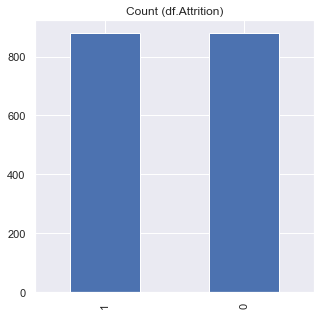

In [187]:
# Class count
count_class_0, count_class_1 = df_final.Attrition.value_counts()

# Divide by class
df_class_0 = df_final[df_final['Attrition'] == 0]
df_class_1 = df_final[df_final['Attrition'] == 1]

# oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_final = pd.concat([df_class_0, df_class_1_over], axis=0)

#print('Random over-sampling:')
print(df_final.Attrition.value_counts())

plt.figure(figsize=(5,5))
df_final.Attrition.value_counts().plot(kind='bar', title='Count (df.Attrition)');

## Prepare our Dataframe for model

In [188]:
# define X (features)
X = df_final.drop('Attrition', axis = 1)

In [189]:
# define y (target)
y = df_final['Attrition']

In [190]:
# check distribution of our target 
print('No. of Attrition') 
print(df_final['Attrition'].groupby(df.Attrition).agg('count'))

No. of Attrition
Attrition
0    879
1    879
Name: Attrition, dtype: int64


**Conclusion** Out of the counts of the number of 'Yes' (1) and 'No' (0) in the target variable we can see that there is quite a large skew in target as shown above. I need to keep in mind that there is a big imbalance in our target variable. We have to handle the imbalances in data (oversampling or undersampling).

# Final Data Check

In [191]:
print(X.shape)
print(y.shape)

(1758, 73)
(1758,)


# Base Model

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### Random Seed

In [193]:
# We set our random seed to zero for reproducibility
seed = 0   

### Train Test Split

In [194]:
# train test splot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, stratify=y, random_state = seed)

In [195]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1406 samples.
Testing set has 352 samples.


In [196]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 703, 0: 703})
Counter({0: 176, 1: 176})


### Scaling

Scaling means that we're transforming our data so that it fits within a specific scale, like 0-100 or 0-1. And we need it to perform some models. By scaling our variables, it can help compare different variables on equal footing. So scaling just changes the range of your data. 

In [197]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [198]:
model_rf = RandomForestClassifier(random_state=seed)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       176
           1       0.96      0.99      0.97       176

    accuracy                           0.97       352
   macro avg       0.98      0.97      0.97       352
weighted avg       0.98      0.97      0.97       352



In [199]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf)))

Accuracy Score : 0.9744318181818182
Precision Score : 0.9562841530054644
Recall Score : 0.9943181818181818
F1 Score : 0.9749303621169917


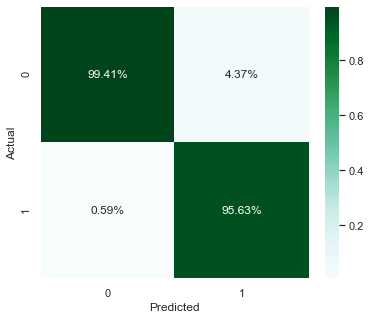

In [200]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

<AxesSubplot:>

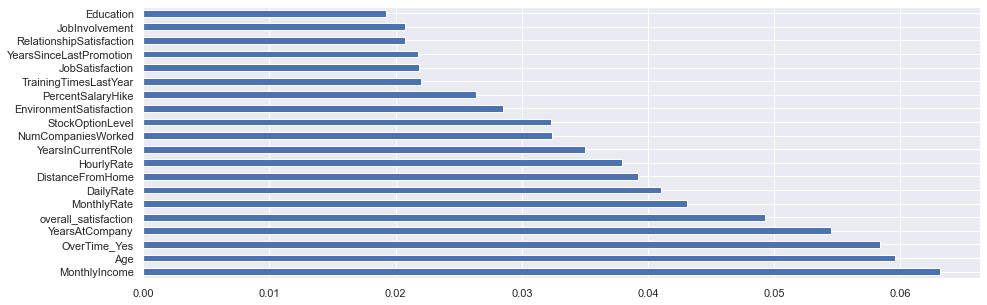

In [201]:
#feature importance in random fores
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

## Logistic Regression

In [202]:
model_lr = LogisticRegression(random_state=seed)
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       176
           1       0.77      0.84      0.80       176

    accuracy                           0.80       352
   macro avg       0.80      0.80      0.80       352
weighted avg       0.80      0.80      0.80       352



In [203]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lr)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_lr)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_lr)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_lr)))

Accuracy Score : 0.7954545454545454
Precision Score : 0.7708333333333334
Recall Score : 0.8409090909090909
F1 Score : 0.8043478260869567


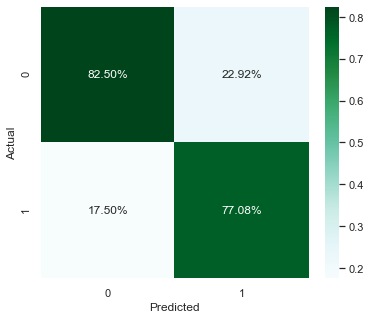

In [204]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## KNN

In [205]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       176
           1       0.76      0.92      0.83       176

    accuracy                           0.81       352
   macro avg       0.83      0.81      0.81       352
weighted avg       0.83      0.81      0.81       352



In [206]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_knn)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_knn)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_knn)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_knn)))

Accuracy Score : 0.8125
Precision Score : 0.7570093457943925
Recall Score : 0.9204545454545454
F1 Score : 0.8307692307692307


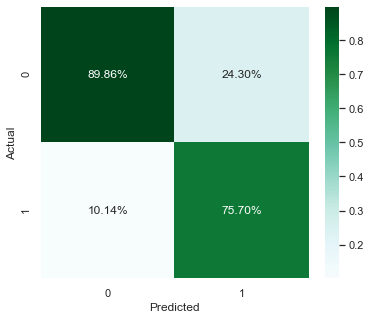

In [207]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## Decision Tree

In [208]:
model_dt = DecisionTreeClassifier(random_state=seed)
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       176
           1       0.86      0.99      0.92       176

    accuracy                           0.91       352
   macro avg       0.93      0.91      0.91       352
weighted avg       0.93      0.91      0.91       352



In [209]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_dt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_dt)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_dt)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_dt)))

Accuracy Score : 0.9147727272727273
Precision Score : 0.8578431372549019
Recall Score : 0.9943181818181818
F1 Score : 0.9210526315789473


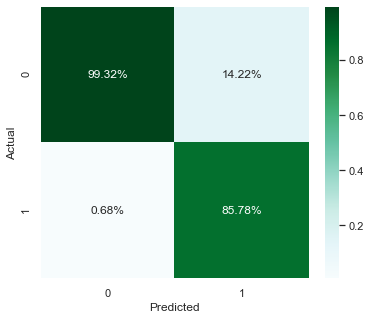

In [210]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## AdaBoost

In [211]:
from sklearn.ensemble import AdaBoostClassifier
model_adab = AdaBoostClassifier(random_state = seed)
model_adab.fit(X_train, y_train)
y_pred_adab = model_adab.predict(X_test)
print(classification_report(y_test, y_pred_adab))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       176
           1       0.78      0.83      0.80       176

    accuracy                           0.80       352
   macro avg       0.80      0.80      0.80       352
weighted avg       0.80      0.80      0.80       352



In [212]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred_adab)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_adab)))
print('Recall Score : ' + str(recall_score(y_test, y_pred_adab)))
print('F1 Score : ' + str(f1_score(y_test, y_pred_adab)))

Accuracy Score : 0.7954545454545454
Precision Score : 0.776595744680851
Recall Score : 0.8295454545454546
F1 Score : 0.8021978021978021


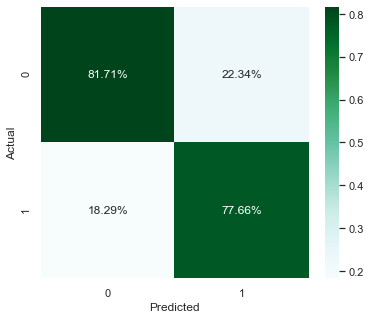

In [213]:
confusion_matrix = pd.crosstab(y_test, y_pred_adab, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## XGBoost

In [214]:
# convert the dataset into an optimized data structure 
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [215]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       176
           1       0.88      0.92      0.90       176

    accuracy                           0.89       352
   macro avg       0.90      0.89      0.89       352
weighted avg       0.90      0.89      0.89       352



In [216]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred_xgb)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_xgb)))
print('Recall Score : ' + str(recall_score(y_test, y_pred_xgb)))
print('F1 Score : ' + str(f1_score(y_test, y_pred_xgb)))

Accuracy Score : 0.8948863636363636
Precision Score : 0.8756756756756757
Recall Score : 0.9204545454545454
F1 Score : 0.8975069252077563


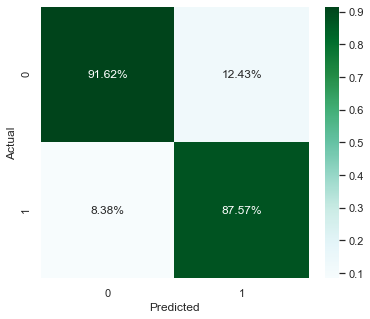

In [217]:
confusion_matrix = pd.crosstab(y_test, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## Summary on Base Model 

After performing the base model with different methods for predicting employee attrition, I got the following results for each model. The Accuracy for each model was quiet good, but the precision, recall and f1-score were very bad. Following I'll go on with feature selection and hyprparameter tuning to get better results. 

**Random Forest**
- Accuracy Score : 0.9602272727272727
- Precision Score : 0.9550561797752809
- Recall Score : 0.9659090909090909
- F1 Score : 0.96045197740113

**Logistic Regression** 
- Accuracy Score : 0.7897727272727273
- Precision Score : 0.7802197802197802
- Recall Score : 0.8068181818181818
- F1 Score : 0.7932960893854749

**KNN**
- Accuracy Score : 0.7755681818181818
- Precision Score : 0.7276995305164319
- Recall Score : 0.8806818181818182
- F1 Score : 0.7969151670951157

**Decision Tree**
- Accuracy Score : 0.9034090909090909
- Precision Score : 0.855
- Recall Score : 0.9715909090909091
- F1 Score : 0.9095744680851063

**AdaBoost**
- Accuracy Score : 0.7954545454545454
- Precision Score : 0.7795698924731183
- Recall Score : 0.8238636363636364
- F1 Score : 0.8011049723756906

**XGBoost**
- Accuracy Score : 0.8920454545454546
- Precision Score : 0.8709677419354839
- Recall Score : 0.9204545454545454
- F1 Score : 0.8950276243093922


I'll go on with Feature Selection on the base model.

# Feature Selection

In [218]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [219]:
len(df_final.columns)

74

In [220]:
feature_name = list(df_final.columns)
# no of maximum features we need to select
num_feats=10

## Pearson Correlation 

In [221]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, num_feats)
print(str(len(cor_feature)), 'selected features')

cor_feature

10 selected features


['monthlyincome_bin_2000',
 'JobInvolvement',
 'StockOptionLevel',
 'YearsAtCompany',
 'MonthlyIncome',
 'Age',
 'MaritalStatus_Single',
 'YearsInCurrentRole',
 'overall_satisfaction',
 'OverTime_Yes']

## Recursive Feature Elimination

In [222]:
X_norm = StandardScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

rfe_feature

Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.
Fitting estimator with 13 features.
10 selected features


['Age',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'overall_satisfaction',
 'Department_Research & Development',
 'Department_Sales',
 'MaritalStatus_Single',
 'OverTime_Yes',
 'hourly_rate_bin_20',
 'monthlyincome_bin_16000']

## Lasso SelectFromModel

In [223]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

embeded_lr_feature

10 selected features


['BusinessTravel_Travel_Frequently',
 'Department_Research & Development',
 'Department_Sales',
 'JobRole_Research Director',
 'MaritalStatus_Single',
 'OverTime_Yes',
 'hourly_rate_bin_20',
 'monthlyincome_bin_2000',
 'monthlyincome_bin_4000',
 'monthlyincome_bin_16000']

## Tree Based Selection

In [224]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

embeded_rf_feature

10 selected features


['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'StockOptionLevel',
 'YearsAtCompany',
 'overall_satisfaction',
 'OverTime_Yes']

# Base Model after feature selection

### Train Test Split

In [225]:
X2 = X[[
 'YearsAtCompany',
 'JobInvolvement',
 'YearsInCurrentRole',
 'overall_satisfaction',
 'MonthlyIncome',
 'Age',
 'MaritalStatus_Single',
 'StockOptionLevel',
 'OverTime_Yes']]

In [226]:
# train test splot
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2 ,y, test_size = 0.2, stratify=y, random_state = seed)

In [227]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train2.shape[0]))
print ("Testing set has {} samples.".format(X_test2.shape[0]))

Training set has 1406 samples.
Testing set has 352 samples.


In [228]:
from collections import Counter
print(Counter(y_train2))
print(Counter(y_test2))

Counter({1: 703, 0: 703})
Counter({0: 176, 1: 176})


### Scaling

Scaling means that we're transforming our data so that it fits within a specific scale, like 0-100 or 0-1. And we need it to perform some models. By scaling our variables, it can help compare different variables on equal footing. So scaling just changes the range of your data. 

In [229]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

## Random Forest

In [230]:
model_rf2 = RandomForestClassifier(random_state=seed)
model_rf2.fit(X_train2,y_train2)
y_pred_rf2 = model_rf2.predict(X_test2)
print(classification_report(y_test2, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       176
           1       0.87      0.99      0.93       176

    accuracy                           0.92       352
   macro avg       0.93      0.92      0.92       352
weighted avg       0.93      0.92      0.92       352



In [231]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test2,y_pred_rf2)))
print('Precision Score : ' + str(precision_score(y_test2,y_pred_rf2)))
print('Recall Score : ' + str(recall_score(y_test2,y_pred_rf2)))
print('F1 Score : ' + str(f1_score(y_test2,y_pred_rf2)))

Accuracy Score : 0.9232954545454546
Precision Score : 0.8706467661691543
Recall Score : 0.9943181818181818
F1 Score : 0.9283819628647214


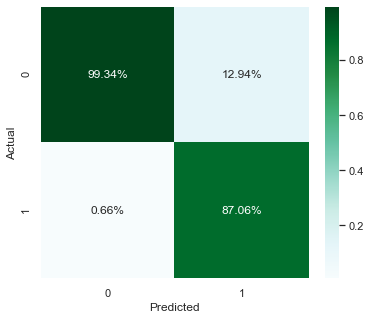

In [232]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test2, y_pred_rf2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## Logistic Regression

In [233]:
model_lr2 = LogisticRegression(random_state=seed)
model_lr2.fit(X_train2,y_train2)
y_pred_lr2 = model_lr2.predict(X_test2)
print(classification_report(y_test2, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       176
           1       0.75      0.77      0.76       176

    accuracy                           0.76       352
   macro avg       0.76      0.76      0.76       352
weighted avg       0.76      0.76      0.76       352



In [234]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test2,y_pred_lr2)))
print('Precision Score : ' + str(precision_score(y_test2,y_pred_lr2)))
print('Recall Score : ' + str(recall_score(y_test2,y_pred_lr2)))
print('F1 Score : ' + str(f1_score(y_test2,y_pred_lr2)))

Accuracy Score : 0.7585227272727273
Precision Score : 0.7513812154696132
Recall Score : 0.7727272727272727
F1 Score : 0.7619047619047619


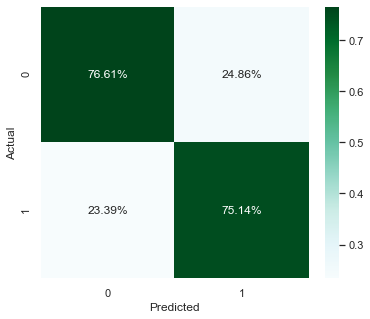

In [235]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test2, y_pred_lr2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## KNN

In [236]:
model_knn2 = KNeighborsClassifier()
model_knn2.fit(X_train2,y_train2)
y_pred_knn2 = model_knn2.predict(X_test2)
print(classification_report(y_test2, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       176
           1       0.73      0.89      0.81       176

    accuracy                           0.78       352
   macro avg       0.80      0.78      0.78       352
weighted avg       0.80      0.78      0.78       352



In [237]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test2,y_pred_knn2)))
print('Precision Score : ' + str(precision_score(y_test2,y_pred_knn2)))
print('Recall Score : ' + str(recall_score(y_test2,y_pred_knn2)))
print('F1 Score : ' + str(f1_score(y_test2,y_pred_knn2)))

Accuracy Score : 0.7840909090909091
Precision Score : 0.7336448598130841
Recall Score : 0.8920454545454546
F1 Score : 0.8051282051282052


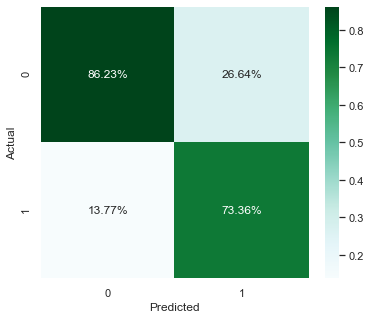

In [238]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test2, y_pred_knn2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## Decision Tree

In [239]:
model_dt2 = DecisionTreeClassifier(random_state=seed)
model_dt2.fit(X_train2,y_train2)
y_pred_dt2 = model_dt2.predict(X_test2)
print(classification_report(y_test2, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       176
           1       0.83      0.99      0.91       176

    accuracy                           0.90       352
   macro avg       0.91      0.90      0.90       352
weighted avg       0.91      0.90      0.90       352



In [240]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test2,y_pred_dt2)))
print('Precision Score : ' + str(precision_score(y_test2,y_pred_dt2)))
print('Recall Score : ' + str(recall_score(y_test2,y_pred_dt2)))
print('F1 Score : ' + str(f1_score(y_test2,y_pred_dt2)))

Accuracy Score : 0.8977272727272727
Precision Score : 0.8333333333333334
Recall Score : 0.9943181818181818
F1 Score : 0.9067357512953368


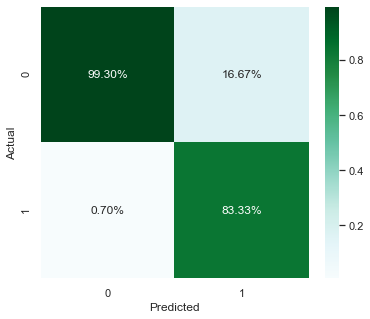

In [241]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test2, y_pred_dt2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## AdaBoost

In [242]:
model_adab2 = AdaBoostClassifier(random_state = seed)
model_adab2.fit(X_train2, y_train2)
y_pred_adab2 = model_adab2.predict(X_test2)
print(classification_report(y_test2, y_pred_adab2))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       176
           1       0.75      0.78      0.77       176

    accuracy                           0.76       352
   macro avg       0.76      0.76      0.76       352
weighted avg       0.76      0.76      0.76       352



In [243]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test2, y_pred_adab2)))
print('Precision Score : ' + str(precision_score(y_test2, y_pred_adab2)))
print('Recall Score : ' + str(recall_score(y_test2, y_pred_adab2)))
print('F1 Score : ' + str(f1_score(y_test2, y_pred_adab2)))

Accuracy Score : 0.7642045454545454
Precision Score : 0.7540983606557377
Recall Score : 0.7840909090909091
F1 Score : 0.7688022284122561


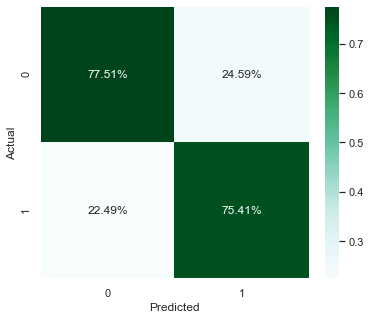

In [244]:
confusion_matrix = pd.crosstab(y_test2, y_pred_adab2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## XGBoost

In [245]:
# convert the dataset into an optimized data structure 
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X2,label=y)

In [246]:
model_xgb2 = xgb.XGBClassifier()
model_xgb2.fit(X_train2, y_train2)
y_pred_xgb2 = model_xgb2.predict(X_test2)
print(classification_report(y_test2, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       176
           1       0.80      0.89      0.84       176

    accuracy                           0.83       352
   macro avg       0.83      0.83      0.83       352
weighted avg       0.83      0.83      0.83       352



In [247]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test2, y_pred_xgb2)))
print('Precision Score : ' + str(precision_score(y_test2, y_pred_xgb2)))
print('Recall Score : ' + str(recall_score(y_test2, y_pred_xgb2)))
print('F1 Score : ' + str(f1_score(y_test2, y_pred_xgb2)))

Accuracy Score : 0.8295454545454546
Precision Score : 0.7959183673469388
Recall Score : 0.8863636363636364
F1 Score : 0.8387096774193548


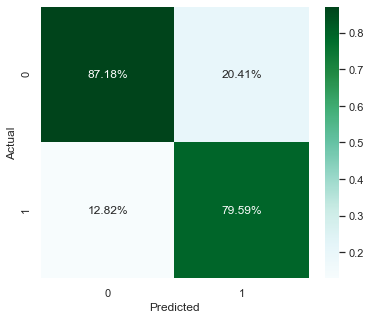

In [248]:
confusion_matrix = pd.crosstab(y_test2, y_pred_xgb2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%',cmap='BuGn');

## Summary for Base Model after Feature Selection 

After performing the base model with a feature selection, I got the following results for each model.

**Random Forest**
- Accuracy Score : 0.9346590909090909
- Precision Score : 0.8844221105527639
- Recall Score : 1.0
- F1 Score : 0.9386666666666666

**Logistic Regression**
- Accuracy Score : 0.7471590909090909
- Precision Score : 0.7301587301587301
- Recall Score : 0.7840909090909091
- F1 Score : 0.7561643835616437

**KNN**
- Accuracy Score : 0.7897727272727273
- Precision Score : 0.7236842105263158
- Recall Score : 0.9375
- F1 Score : 0.8168316831683169

**Decision Tree**
- Accuracy Score : 0.9005681818181818
- Precision Score : 0.8373205741626795
- Recall Score : 0.9943181818181818
- F1 Score : 0.9090909090909091

**AdaBoost**
- Accuracy Score : 0.7840909090909091
- Precision Score : 0.7631578947368421
- Recall Score : 0.8238636363636364
- F1 Score : 0.7923497267759563

**XGBoost**
- Accuracy Score : 0.8380681818181818
- Precision Score : 0.7989949748743719
- Recall Score : 0.9034090909090909
- F1 Score : 0.8480000000000001

# Future Work

Even though the results of each model are quiet good there is room for further analysis and improvement and tuning of the models. In addition, more classifiers and different architectures can be tested in future attempts.


- **Outliers** Need to be checked , boxplots
- **Further Models** I'll try the SVM and maybe neural networks
- **Further goals** Modeling the business costs 